In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.io import loadmat
from sklearn.model_selection import train_test_split                 
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from sklearn import preprocessing   
from sklearn.metrics import accuracy_score,roc_auc_score,auc,confusion_matrix,roc_curve
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler,SMOTE,SMOTENC,ADASYN,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest

In [3]:
m = loadmat("PPMI.mat") 

In [4]:
print(m)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 15 16:16:33 2021', '__version__': '1.0', '__globals__': [], 'NC': array([[3388, 4966, 4946, ...,  414,  639,  616],
       [3477, 2667, 3126, ...,  434,  678,  614],
       [3774, 5791, 3636, ...,  294,  509,  487],
       ...,
       [5318, 4989, 6339, ...,  479,  821,  736],
       [3228, 4514, 7793, ...,  383,  673,  603],
       [3870, 3959, 3314, ...,  414,  761,  771]], dtype=uint16), 'PD': array([[4362, 4543, 4222, ...,  412,  728,  751],
       [4564, 4011, 4284, ...,  340,  483,  615],
       [3342, 4094, 5394, ...,  479,  585,  600],
       ...,
       [5902, 6280, 5432, ...,  398,  600,  540],
       [3678, 2737, 3252, ...,  419,  548,  540],
       [4160, 3962, 3423, ...,  402,  592,  620]], dtype=uint16)}


In [5]:
min_max_scaler =preprocessing.MinMaxScaler()
PD=np.zeros((m['PD'].shape[0],3,98))
for i in range(m['PD'].shape[0]):
    PD_i= m['PD'][i][:].reshape(3,98)
    PD[i][0:3][:]=PD_i
NC=np.zeros((m['NC'].shape[0],3,98))
for i in range(m['NC'].shape[0]):
    NC_i=  m['PD'][i][:].reshape(3,98)
    NC[i][0:3][:]=NC_i

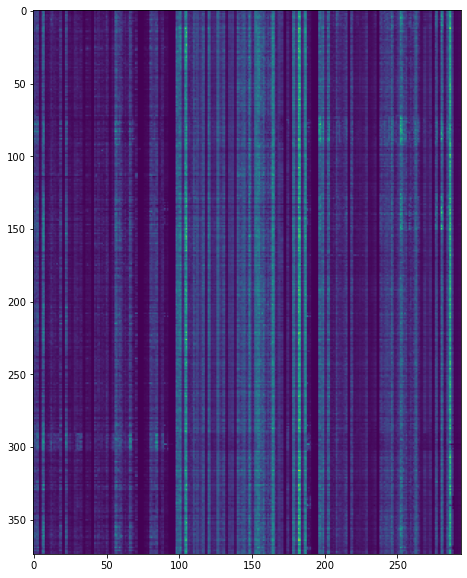

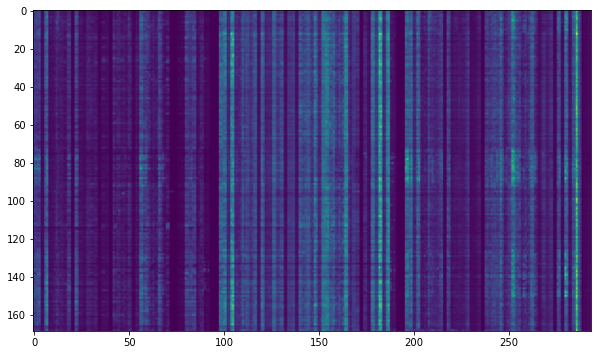

NameError: name 'PD_sum' is not defined

<Figure size 720x720 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(PD.reshape(m['PD'].shape[0],-1))
plt.show() 
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(NC.reshape(m['NC'].shape[0],-1))
plt.show() 
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(PD_sum)
plt.show() 
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(NC_sum)
plt.show() 
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(PD_sum-NC_sum)
plt.show()

In [8]:
label_PD = [0]*m['PD'].shape[0]
label_NC = [1]*m['NC'].shape[0]
PD = PD.tolist()
NC = NC.tolist()
df = PD + NC
label = label_PD + label_NC
df = np.array(df)
print(df.shape)
label = np.array(label)
PD = np.array(PD)
dataset=PD
print(PD.shape)
NC = np.array(NC)
print(NC.shape)
label_PD=np.array(label_PD)
label_NC=np.array(label_NC)

(543, 3, 98)
(374, 3, 98)
(169, 3, 98)


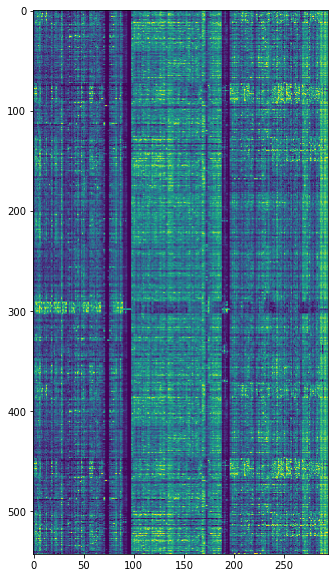

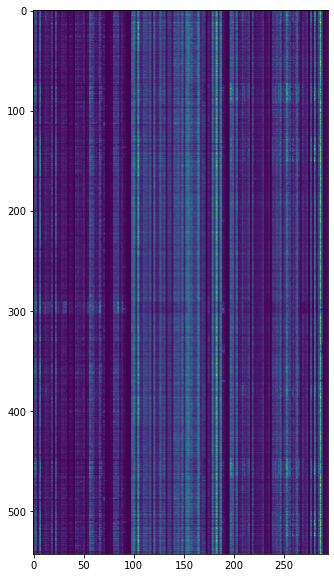

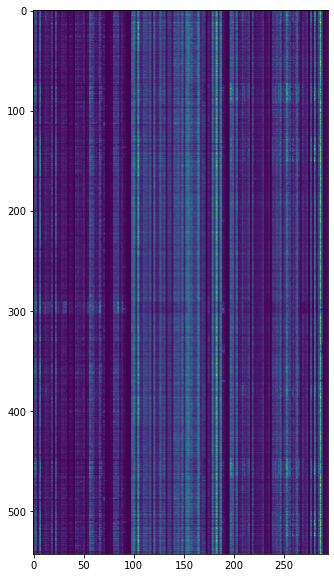

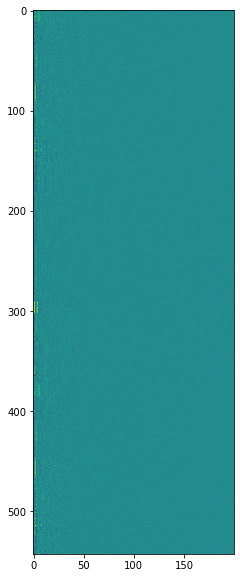

In [9]:
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(min_max_scaler.fit_transform(df.reshape(543,-1)))
plt.show()
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(df.reshape(543,-1))
plt.show()
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
plt.imshow(df.reshape(543,-1))
plt.show()
pca = PCA(n_components=200)#PCA降维
fig = plt.figure(figsize=(10,10), facecolor='w', edgecolor='k')
min_max_df=min_max_scaler.fit_transform(df.reshape((543, 3*98)))
plt.imshow(pca.fit_transform(min_max_df.reshape(543,-1)))
plt.show()

In [10]:
def progress(data):
    data = data[:,:]
    #print(data.shape)
    data = np.corrcoef(data)
    #print(data)
    data = np.tril(data)
    len = data.shape[0]
    new_data = []
    for i in range(len):
        for j in range(i):
            new_data.append(data[i, j])
    data = np.asarray([new_data])
    data = data.astype(np.float32)
    return data

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df , label, test_size = 0.1)  

In [18]:
def model_train_test(this_train_x,this_train_y,this_test_x,this_test_y): 
    train_dataset=this_train_x.reshape(this_train_x.shape[0],-1)
    test_dataset=this_test_x.reshape(this_test_x.shape[0],-1)
    acc_total_train = 0
    acc_total_test = 0
    #model = SVC(C=1,kernel='poly', degree=2,probability=False)
    model = RandomForestClassifier(max_depth=450,n_estimators=50,max_features=50)
    model.fit(train_dataset, this_train_y)

    pred = model.predict(train_dataset)
    acc = accuracy_score(this_train_y, pred)
    
    fpr_train,tpr_train,threshold_train = roc_curve(this_train_y, pred) 
    roc_auc_train = auc(fpr_train,tpr_train)
    acc_total_train += acc
    pred = model.predict(test_dataset)
    acc = accuracy_score(this_test_y, pred)
    fpr,tpr,threshold = roc_curve(this_test_y, pred) 
    roc_auc = auc(fpr,tpr)
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='test ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.plot(fpr_train, tpr_train, color='red',
         lw=lw, label='train ROC curve (area = %0.2f)' % roc_auc_train) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    if(len(set(this_test_y))!=1):
        roc=roc_auc_score(this_test_y, pred)
        sensitivity=confusion_matrix(this_test_y, pred)[0][0]/(confusion_matrix(this_test_y, pred)[0][0]+confusion_matrix(this_test_y, pred)[0][1])
        specificity=confusion_matrix(this_test_y, pred)[1][1]/(confusion_matrix(this_test_y, pred)[1][1]+confusion_matrix(this_test_y, pred)[1][0])
    else:
        roc=0
        sensitivity=0
        specificity=0
    acc_total_test += acc
    print('\n 训练集',acc_total_train, '测试集', acc_total_test)
    return acc_total_test,acc_total_train,roc,sensitivity,specificity#,this_confusion_matrix

In [19]:
def kfold_train_test(n):
    from sklearn.model_selection import KFold
    accuracy = list()   
    train_accuracy = [] 
    roc_all=[]
    sensitivity_all=[]
    specificity_all=[]
    k=10    #10折交叉验证重复k次
    for i in range(k):
        kfold = KFold(n_splits=n,shuffle=True)
        for train_index, test_index in kfold.split(df, label):
            # train_index 就是分类的训练集的下标，test_index 就是分配的验证集的下标
            this_train_x, this_train_y = df[train_index], label[train_index]  # 本组训练集
            this_test_x, this_test_y = df[test_index], label[test_index]  # 本组验证集
            # 训练本组的数据，并计算准确率
            acc,train_acc,roc,sensitivity,specificity=model_train_test(this_train_x,this_train_y,this_test_x,this_test_y)
            accuracy.append(acc)
            train_accuracy.append(train_acc)
            print('roc:',roc)
            print('sensitivity:',sensitivity)
            print('specificity:',specificity)
            roc_all.append(roc)
            sensitivity_all.append(sensitivity)
            specificity_all.append(specificity)
            #print(accuracy)  # 得到预测结果区间[0,1]
    roc_all=np.array(roc_all)
    roc_all=roc_all[np.nonzero(roc_all)]
    sensitivity_all=np.array(sensitivity_all)
    sensitivity_all=sensitivity_all[np.nonzero(sensitivity_all)]
    specificity_all=np.array(specificity_all)
    specificity_all=specificity_all[np.nonzero(specificity_all)]
    if(np.array(specificity_all).shape[0]==0):
        specificity_all=np.zeros((1,1))
    print('average test accuracy:',np.array(accuracy).sum()/(k*n))
    print('average train accuracy:',np.array(train_accuracy).sum()/(k*n))
    print('average roc:',np.array(roc_all).sum()/np.array(roc_all).shape[0])
    print('average sensitivity:',np.array(sensitivity_all).sum()/np.array(sensitivity_all).shape[0])
    print('average specificity:',np.array(specificity_all).sum()/np.array(specificity_all).shape[0])
    plt.plot(np.array(accuracy))
    plt.plot(np.array(train_accuracy))

<Figure size 432x288 with 0 Axes>

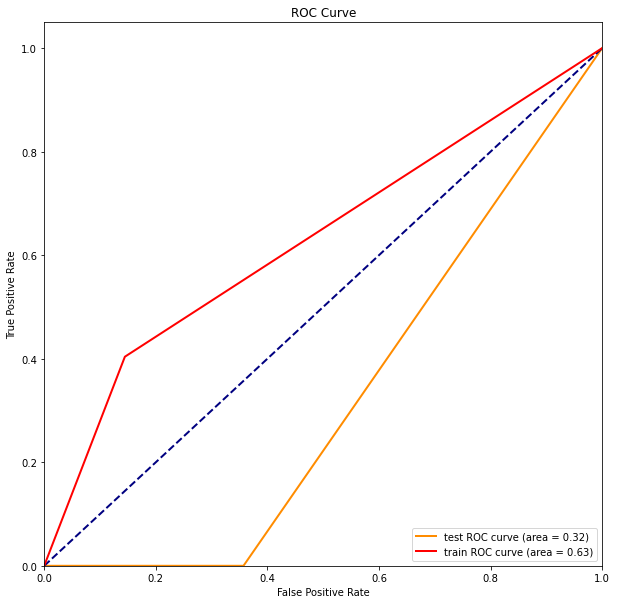


 训练集 0.7110655737704918 测试集 0.4909090909090909
roc: 0.3214285714285714
sensitivity: 0.6428571428571429
specificity: 0.0


<Figure size 432x288 with 0 Axes>

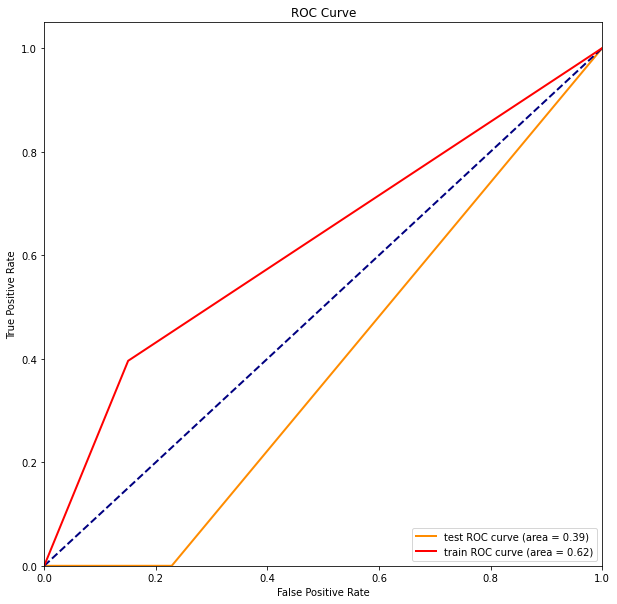


 训练集 0.7110655737704918 测试集 0.4909090909090909
roc: 0.38571428571428573
sensitivity: 0.7714285714285715
specificity: 0.0


<Figure size 432x288 with 0 Axes>

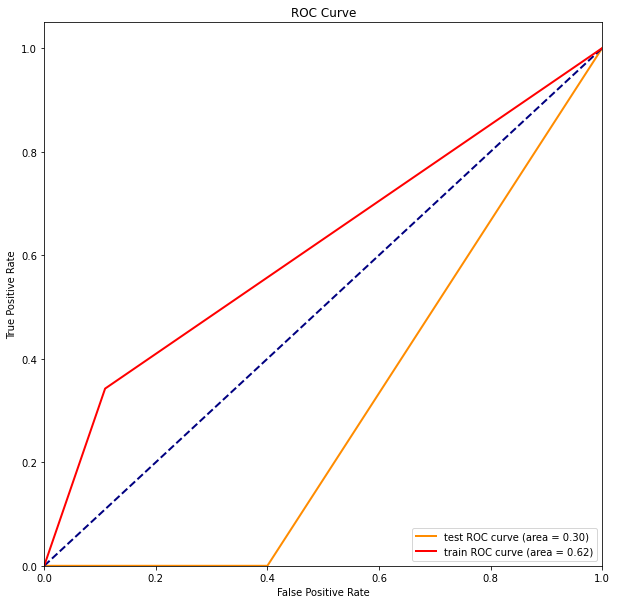


 训练集 0.7233606557377049 测试集 0.38181818181818183
roc: 0.3
sensitivity: 0.6
specificity: 0.0


<Figure size 432x288 with 0 Axes>

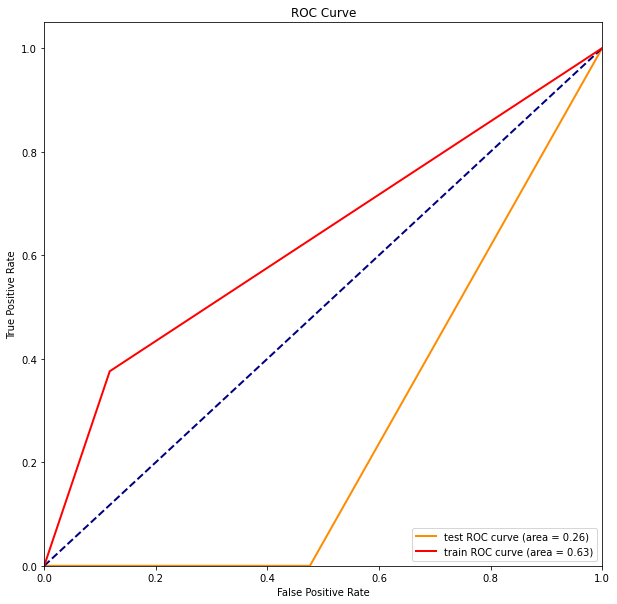


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.2619047619047619
sensitivity: 0.5238095238095238
specificity: 0.0


<Figure size 432x288 with 0 Axes>

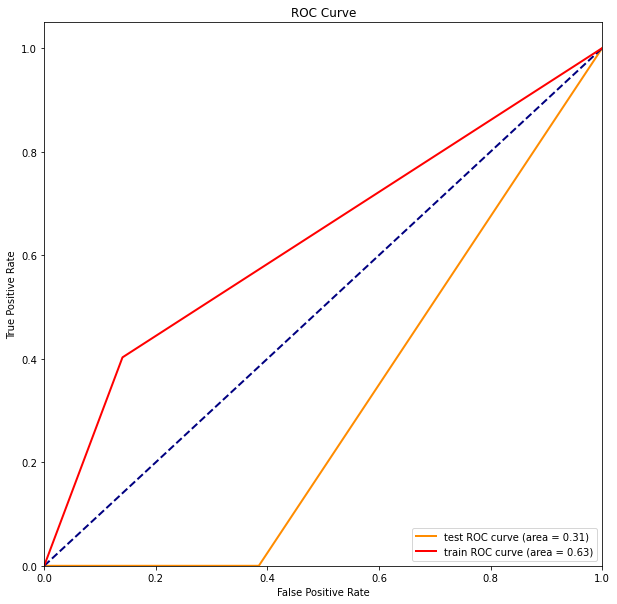


 训练集 0.7157464212678937 测试集 0.4444444444444444
roc: 0.3076923076923077
sensitivity: 0.6153846153846154
specificity: 0.0


<Figure size 432x288 with 0 Axes>

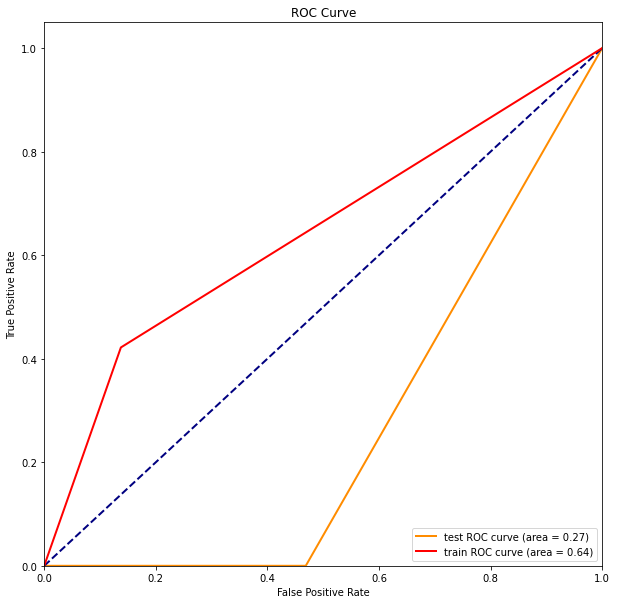


 训练集 0.7300613496932515 测试集 0.3148148148148148
roc: 0.265625
sensitivity: 0.53125
specificity: 0.0


<Figure size 432x288 with 0 Axes>

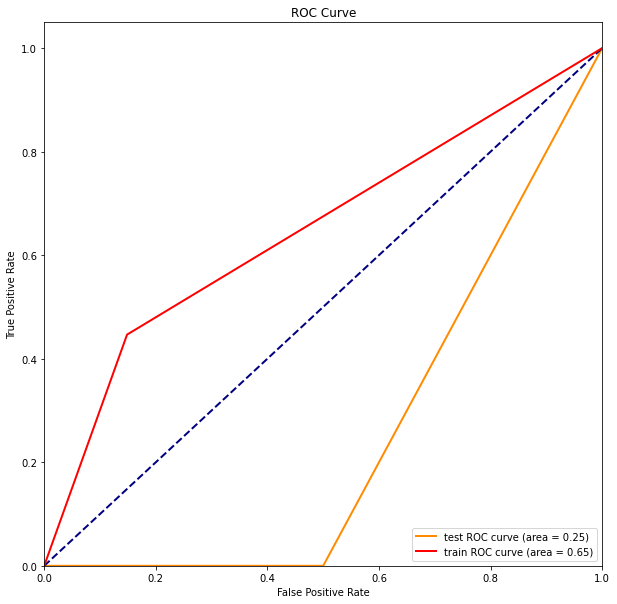


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.25
sensitivity: 0.5
specificity: 0.0


<Figure size 432x288 with 0 Axes>

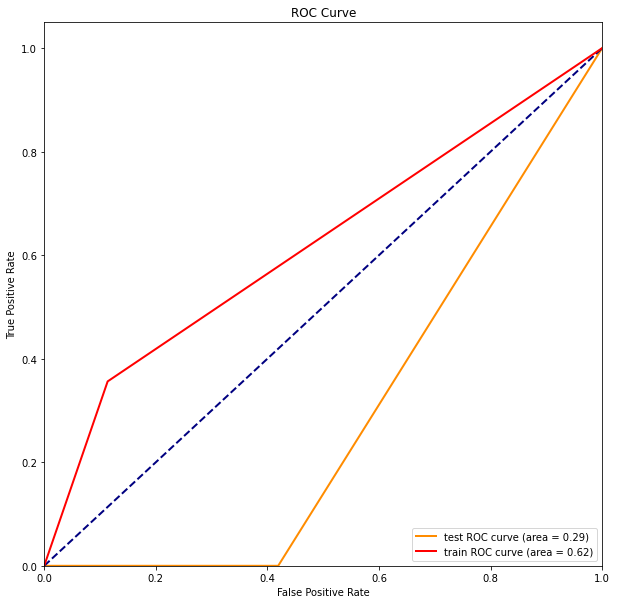


 训练集 0.7280163599182005 测试集 0.3333333333333333
roc: 0.29032258064516125
sensitivity: 0.5806451612903226
specificity: 0.0


<Figure size 432x288 with 0 Axes>

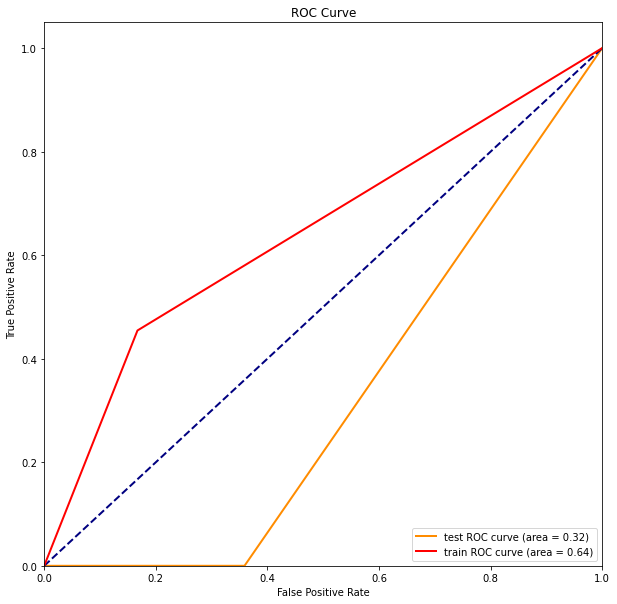


 训练集 0.7137014314928425 测试集 0.46296296296296297
roc: 0.3205128205128205
sensitivity: 0.6410256410256411
specificity: 0.0


<Figure size 432x288 with 0 Axes>

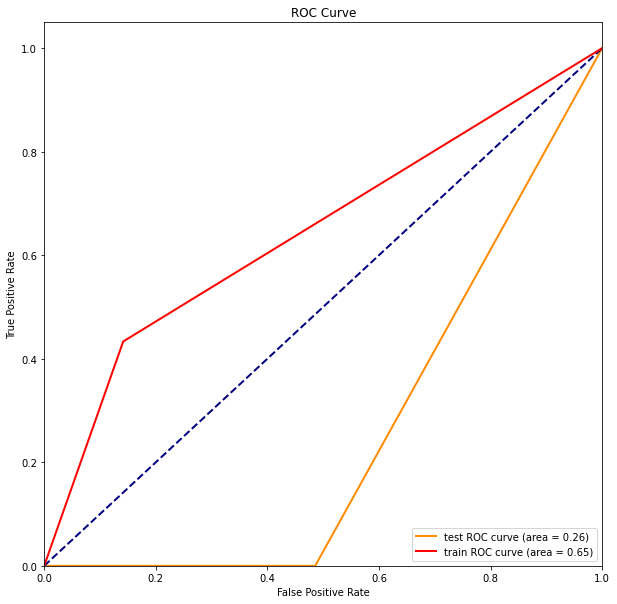


 训练集 0.7280163599182005 测试集 0.3333333333333333
roc: 0.2571428571428571
sensitivity: 0.5142857142857142
specificity: 0.0


<Figure size 432x288 with 0 Axes>

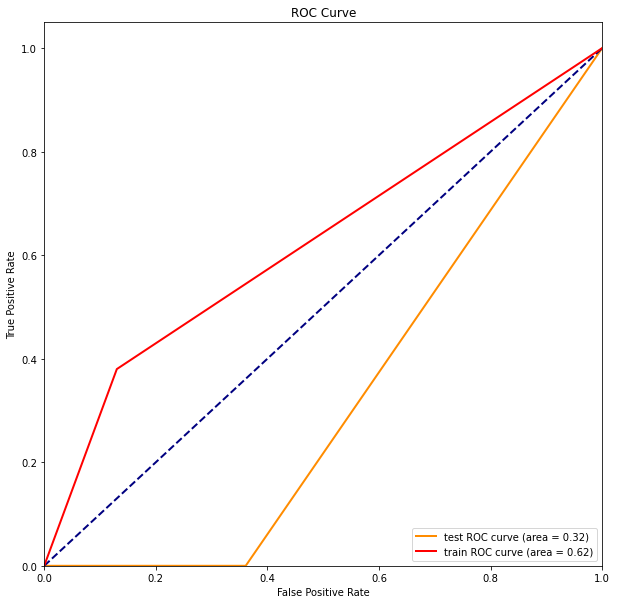


 训练集 0.7192622950819673 测试集 0.41818181818181815
roc: 0.3194444444444444
sensitivity: 0.6388888888888888
specificity: 0.0


<Figure size 432x288 with 0 Axes>

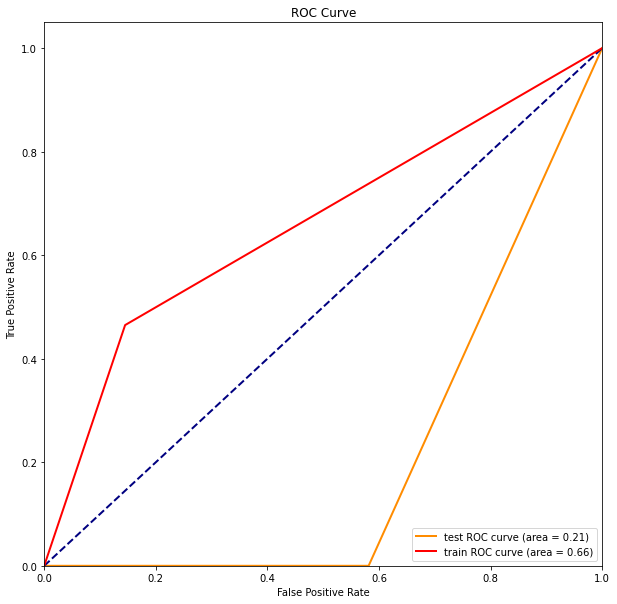


 训练集 0.7295081967213115 测试集 0.32727272727272727
roc: 0.20930232558139533
sensitivity: 0.4186046511627907
specificity: 0.0


<Figure size 432x288 with 0 Axes>

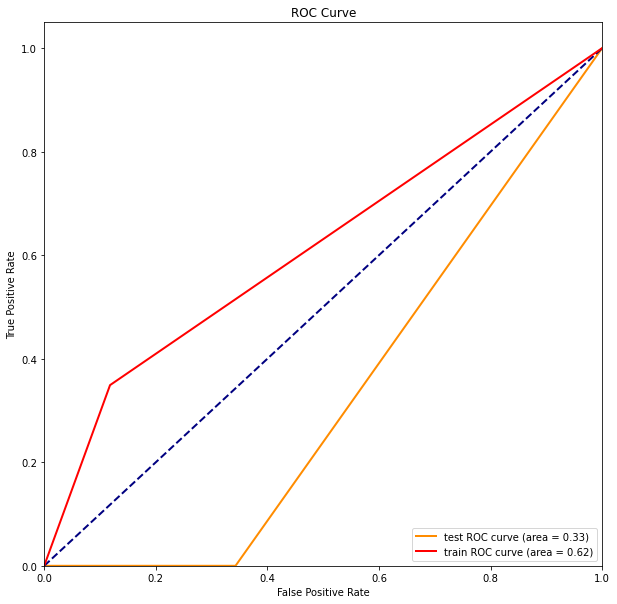


 训练集 0.7192622950819673 测试集 0.41818181818181815
roc: 0.32857142857142857
sensitivity: 0.6571428571428571
specificity: 0.0


<Figure size 432x288 with 0 Axes>

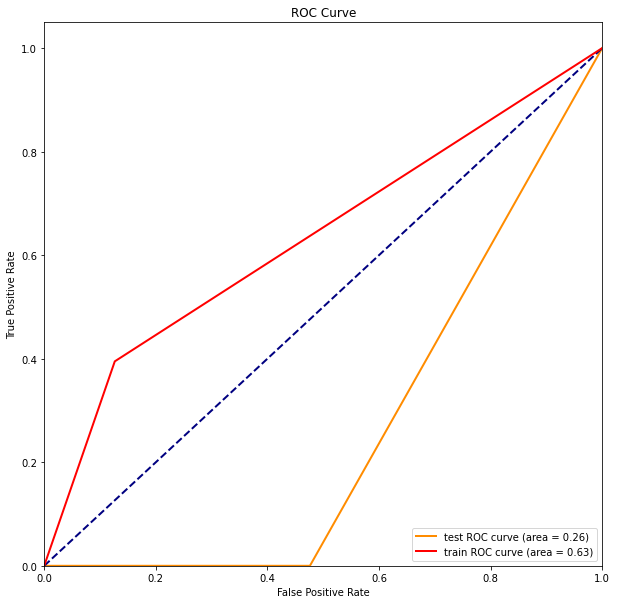


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.2619047619047619
sensitivity: 0.5238095238095238
specificity: 0.0


<Figure size 432x288 with 0 Axes>

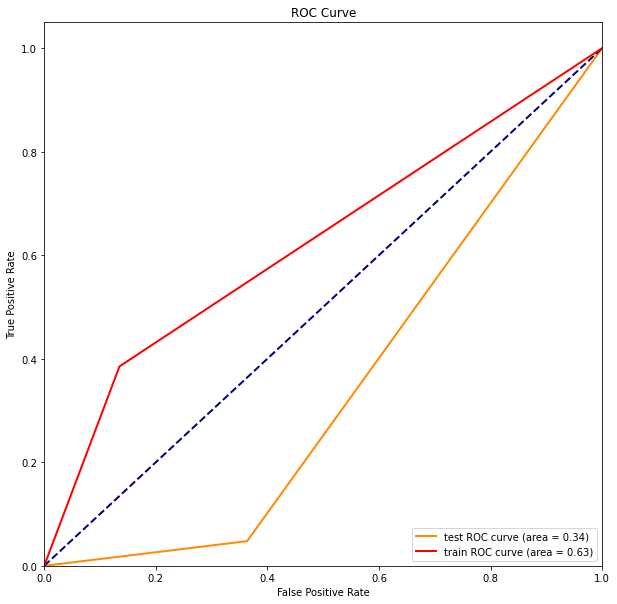


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.341991341991342
sensitivity: 0.6363636363636364
specificity: 0.047619047619047616


<Figure size 432x288 with 0 Axes>

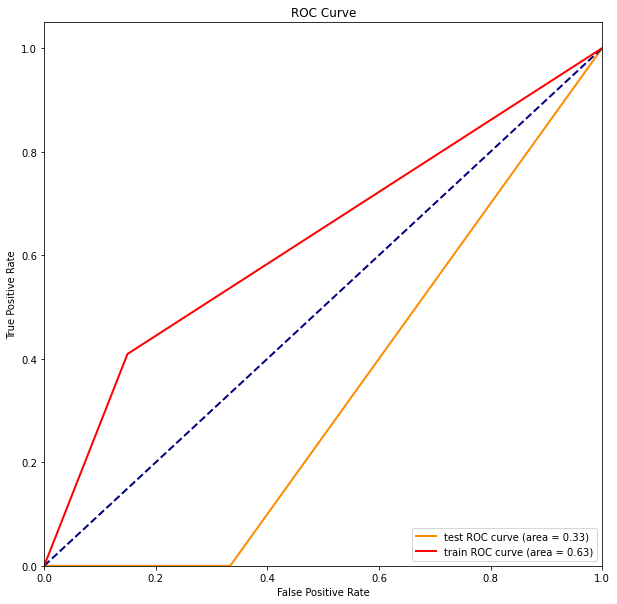


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.33333333333333337
sensitivity: 0.6666666666666666
specificity: 0.0


<Figure size 432x288 with 0 Axes>

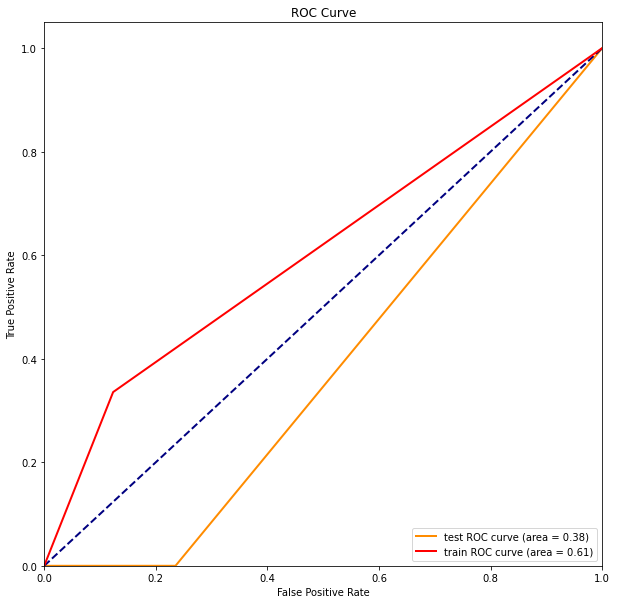


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.38235294117647056
sensitivity: 0.7647058823529411
specificity: 0.0


<Figure size 432x288 with 0 Axes>

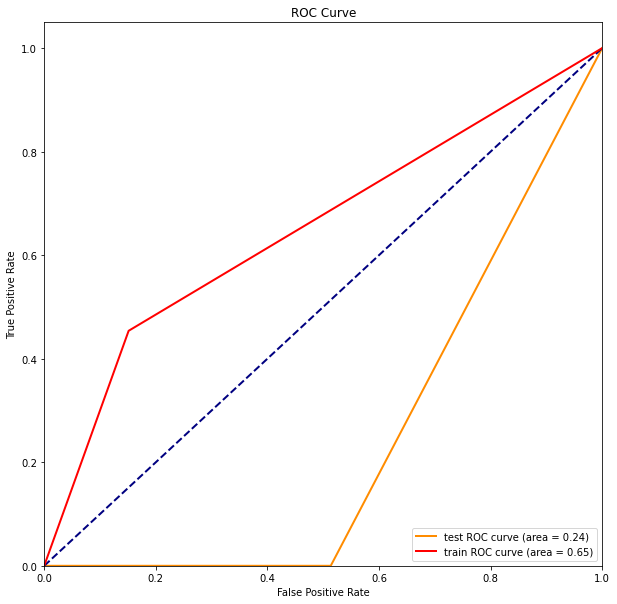


 训练集 0.7259713701431493 测试集 0.3333333333333333
roc: 0.24324324324324326
sensitivity: 0.4864864864864865
specificity: 0.0


<Figure size 432x288 with 0 Axes>

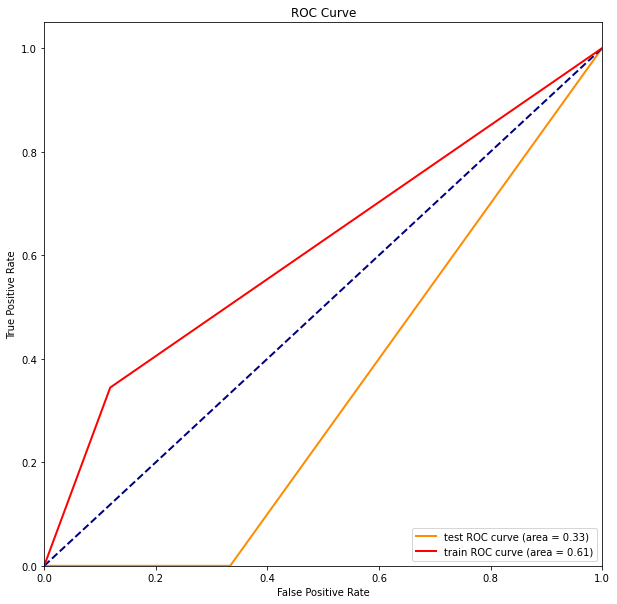


 训练集 0.7157464212678937 测试集 0.4444444444444444
roc: 0.33333333333333337
sensitivity: 0.6666666666666666
specificity: 0.0


<Figure size 432x288 with 0 Axes>

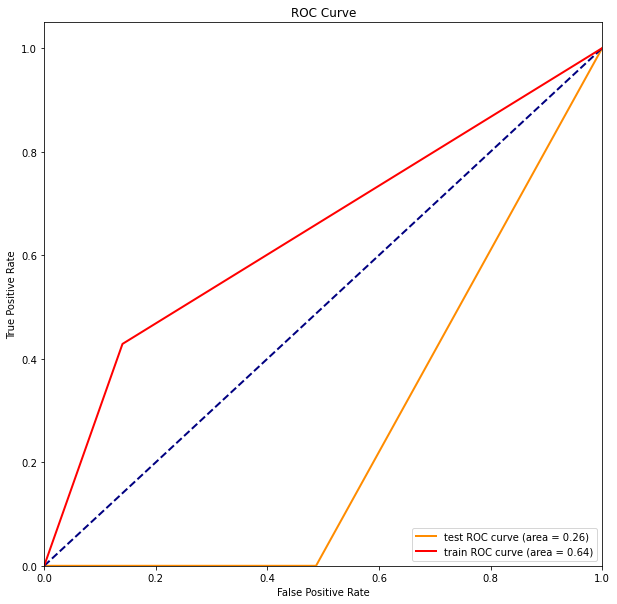


 训练集 0.7239263803680982 测试集 0.37037037037037035
roc: 0.2564102564102564
sensitivity: 0.5128205128205128
specificity: 0.0


<Figure size 432x288 with 0 Axes>

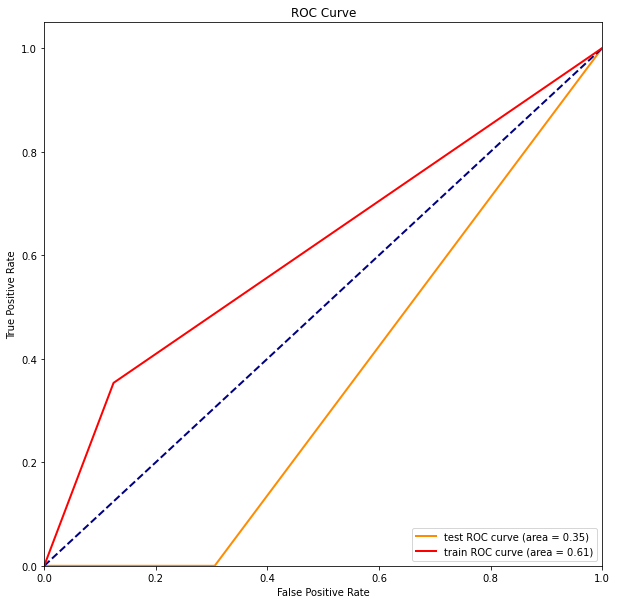


 训练集 0.7151639344262295 测试集 0.45454545454545453
roc: 0.3472222222222222
sensitivity: 0.6944444444444444
specificity: 0.0


<Figure size 432x288 with 0 Axes>

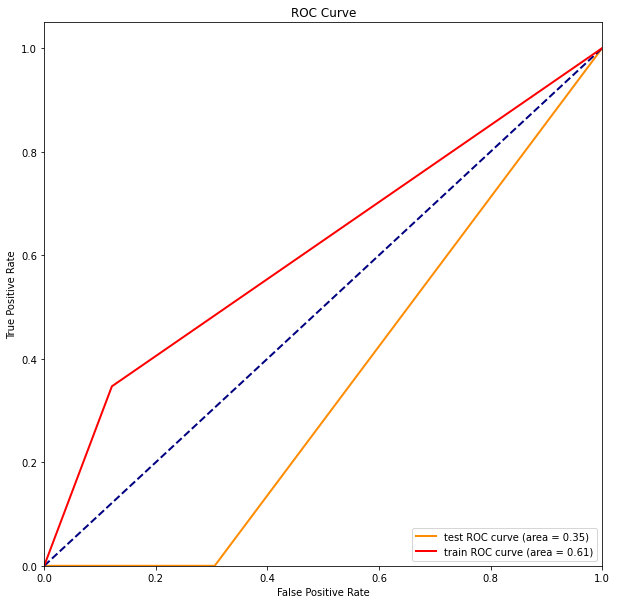


 训练集 0.7151639344262295 测试集 0.45454545454545453
roc: 0.3472222222222222
sensitivity: 0.6944444444444444
specificity: 0.0


<Figure size 432x288 with 0 Axes>

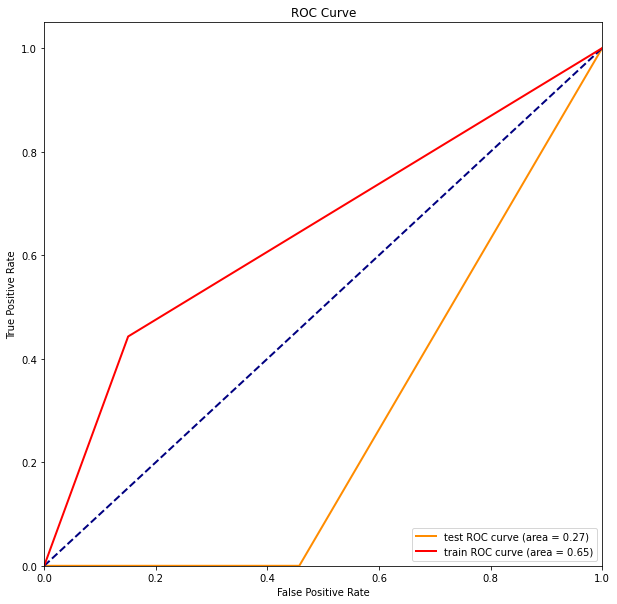


 训练集 0.7254098360655737 测试集 0.34545454545454546
roc: 0.27142857142857146
sensitivity: 0.5428571428571428
specificity: 0.0


<Figure size 432x288 with 0 Axes>

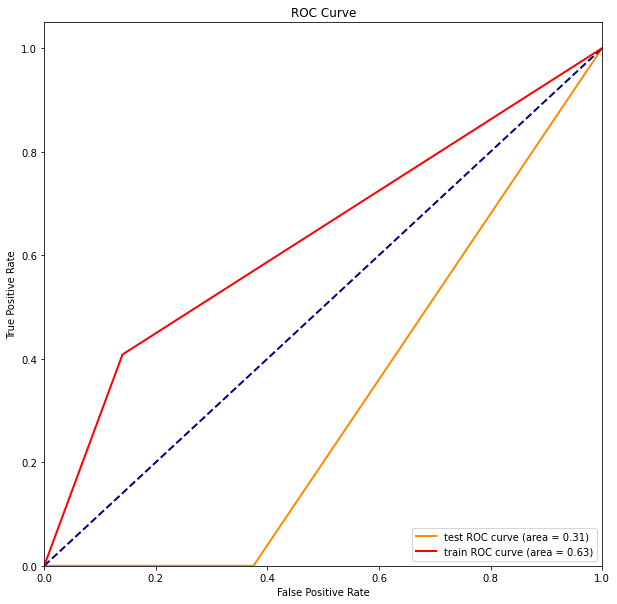


 训练集 0.7239263803680982 测试集 0.37037037037037035
roc: 0.3125
sensitivity: 0.625
specificity: 0.0


<Figure size 432x288 with 0 Axes>

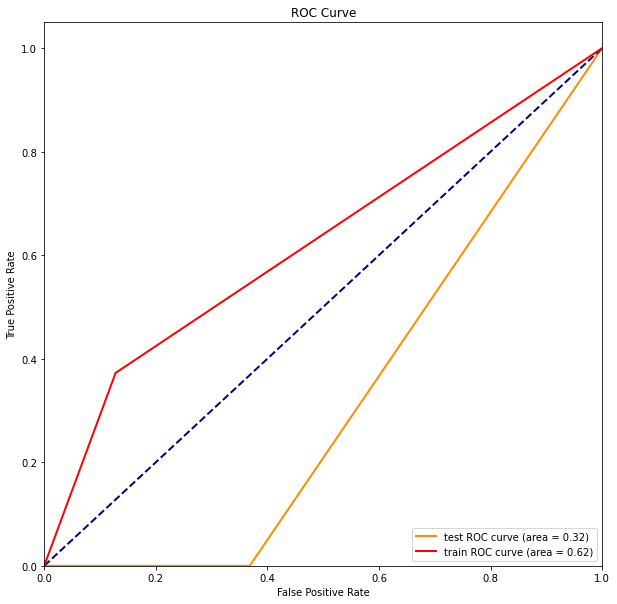


 训练集 0.7157464212678937 测试集 0.4444444444444444
roc: 0.3157894736842105
sensitivity: 0.631578947368421
specificity: 0.0


<Figure size 432x288 with 0 Axes>

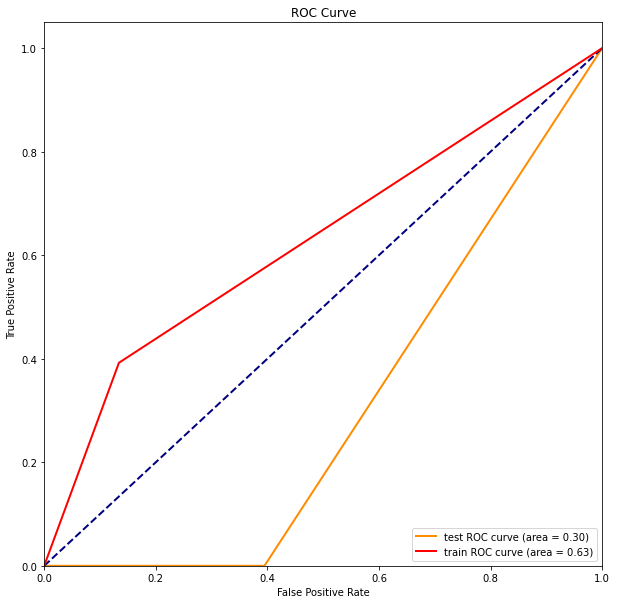


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.3026315789473684
sensitivity: 0.6052631578947368
specificity: 0.0


<Figure size 432x288 with 0 Axes>

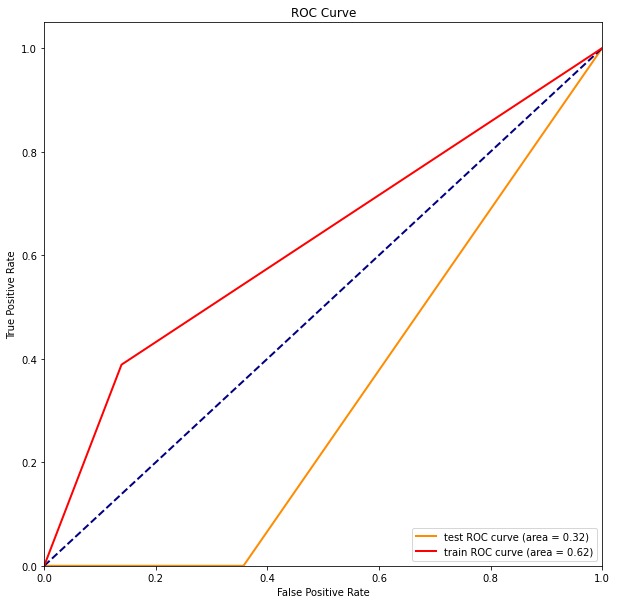


 训练集 0.7096114519427403 测试集 0.5
roc: 0.3214285714285714
sensitivity: 0.6428571428571429
specificity: 0.0


<Figure size 432x288 with 0 Axes>

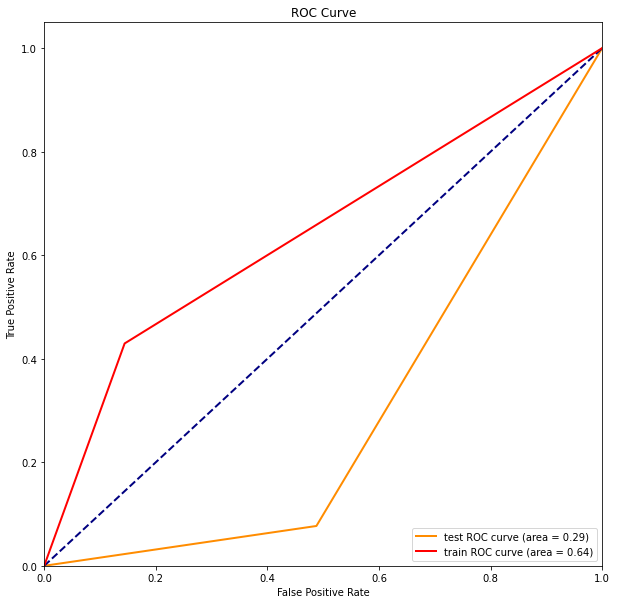


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.2945590994371482
sensitivity: 0.5121951219512195
specificity: 0.07692307692307693


<Figure size 432x288 with 0 Axes>

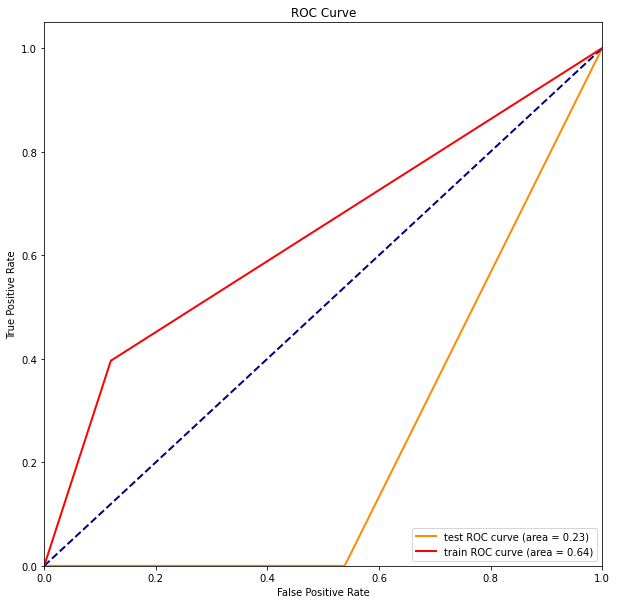


 训练集 0.7280163599182005 测试集 0.3333333333333333
roc: 0.23076923076923078
sensitivity: 0.46153846153846156
specificity: 0.0


<Figure size 432x288 with 0 Axes>

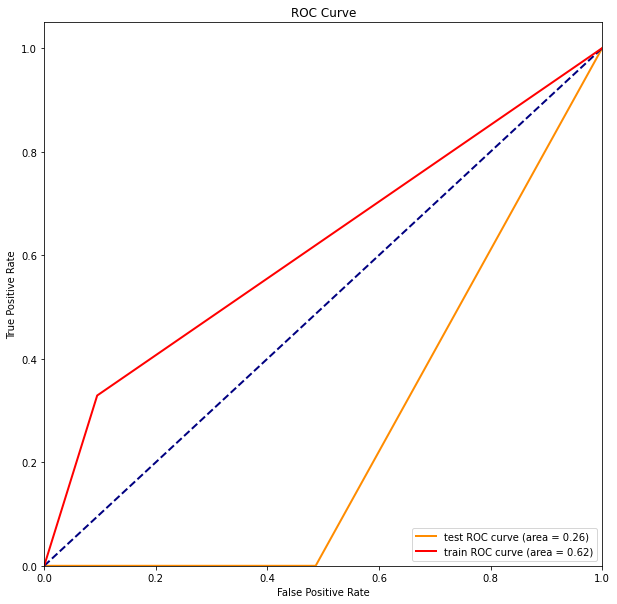


 训练集 0.7259713701431493 测试集 0.35185185185185186
roc: 0.25675675675675674
sensitivity: 0.5135135135135135
specificity: 0.0


<Figure size 432x288 with 0 Axes>

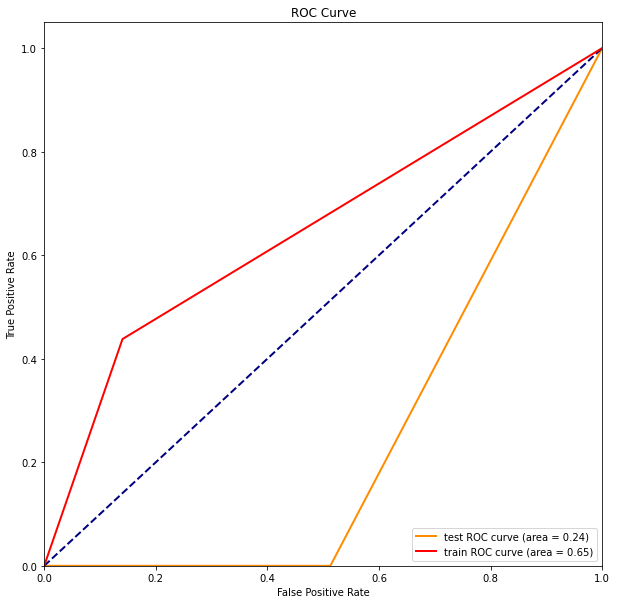


 训练集 0.7274590163934426 测试集 0.34545454545454546
roc: 0.2435897435897436
sensitivity: 0.48717948717948717
specificity: 0.0


<Figure size 432x288 with 0 Axes>

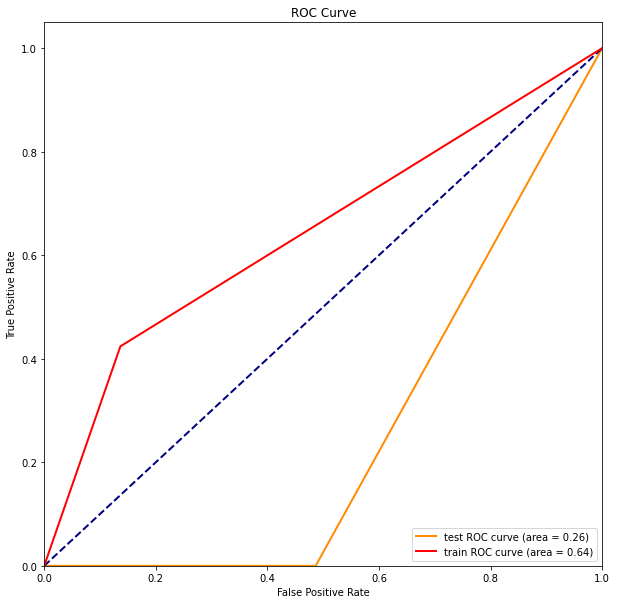


 训练集 0.7274590163934426 测试集 0.34545454545454546
roc: 0.25675675675675674
sensitivity: 0.5135135135135135
specificity: 0.0


<Figure size 432x288 with 0 Axes>

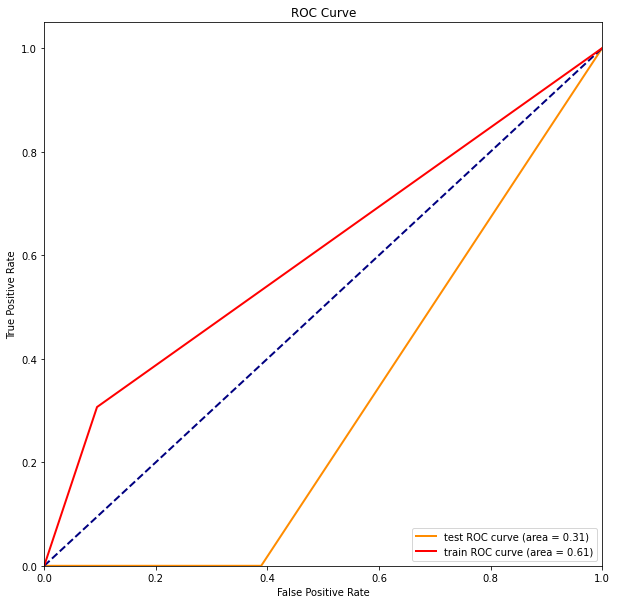


 训练集 0.7213114754098361 测试集 0.4
roc: 0.3055555555555556
sensitivity: 0.6111111111111112
specificity: 0.0


<Figure size 432x288 with 0 Axes>

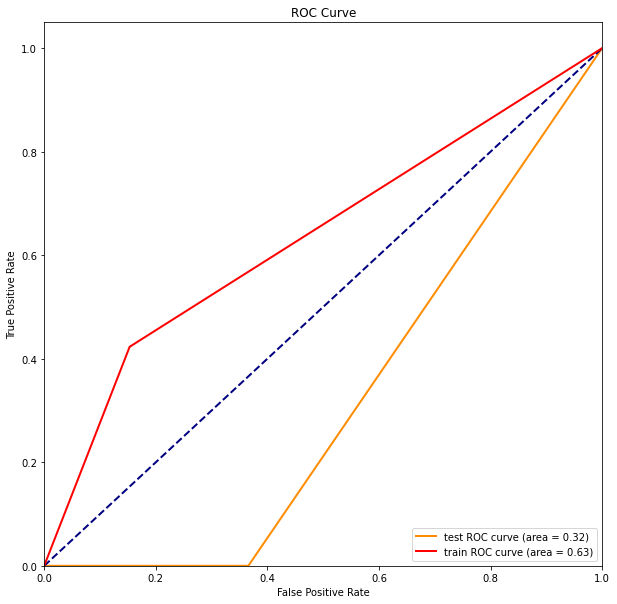


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.3170731707317073
sensitivity: 0.6341463414634146
specificity: 0.0


<Figure size 432x288 with 0 Axes>

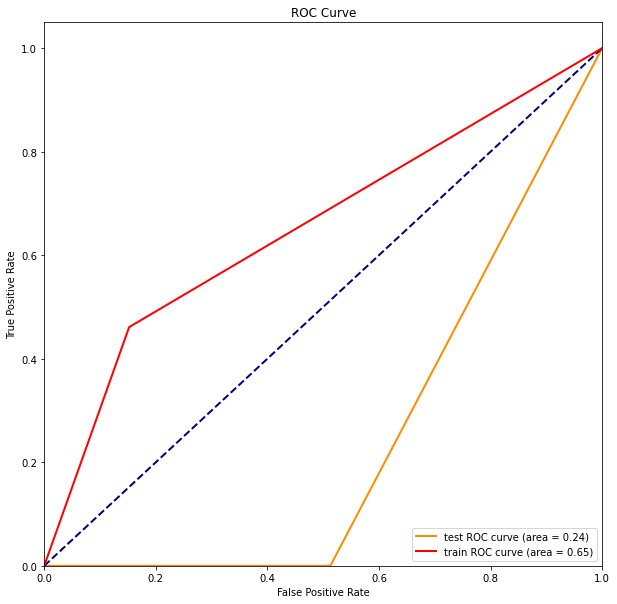


 训练集 0.7259713701431493 测试集 0.35185185185185186
roc: 0.2435897435897436
sensitivity: 0.48717948717948717
specificity: 0.0


<Figure size 432x288 with 0 Axes>

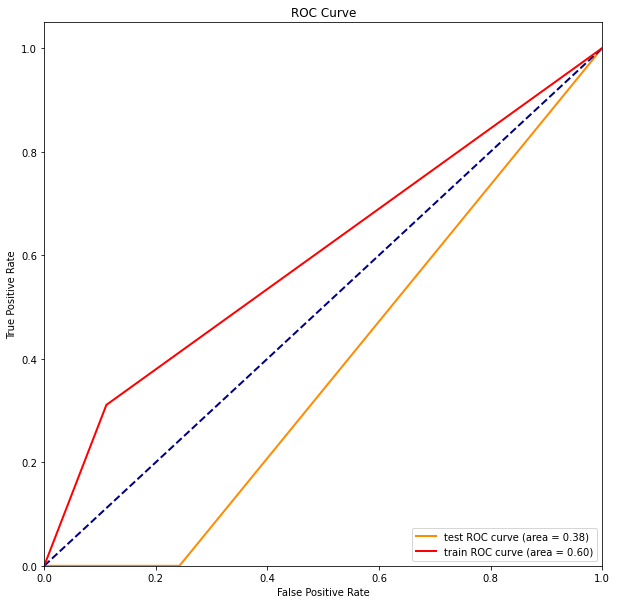


 训练集 0.7137014314928425 测试集 0.46296296296296297
roc: 0.3787878787878788
sensitivity: 0.7575757575757576
specificity: 0.0


<Figure size 432x288 with 0 Axes>

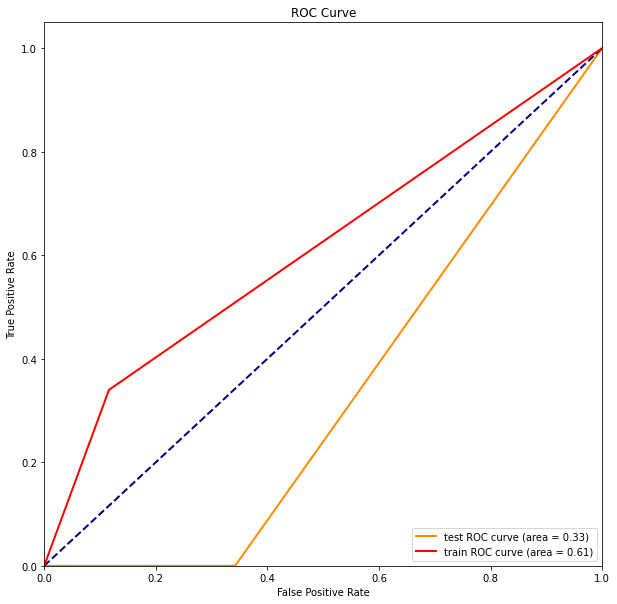


 训练集 0.7137014314928425 测试集 0.46296296296296297
roc: 0.32894736842105265
sensitivity: 0.6578947368421053
specificity: 0.0


<Figure size 432x288 with 0 Axes>

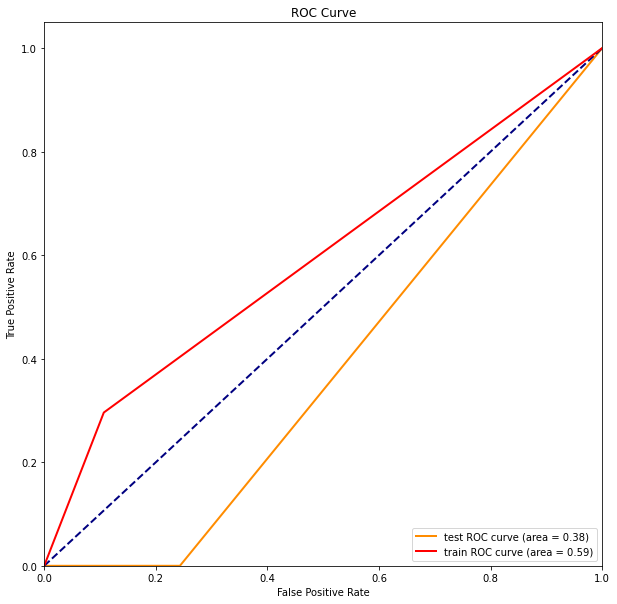


 训练集 0.7075664621676891 测试集 0.5185185185185185
roc: 0.3783783783783784
sensitivity: 0.7567567567567568
specificity: 0.0


<Figure size 432x288 with 0 Axes>

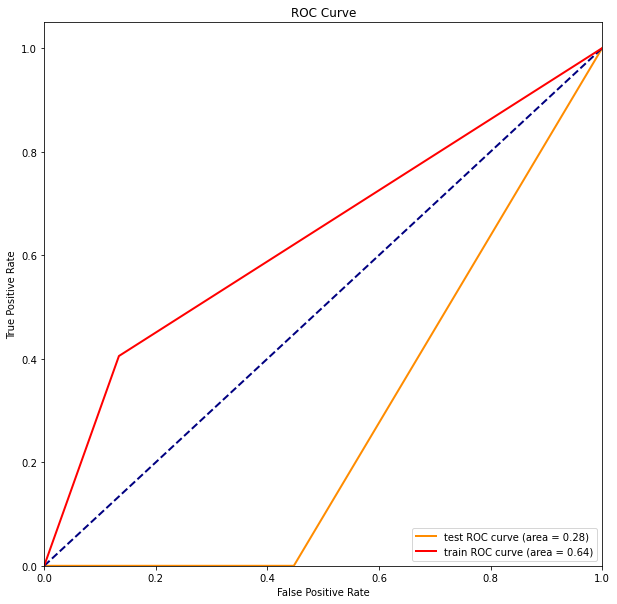


 训练集 0.721881390593047 测试集 0.3888888888888889
roc: 0.2763157894736842
sensitivity: 0.5526315789473685
specificity: 0.0


<Figure size 432x288 with 0 Axes>

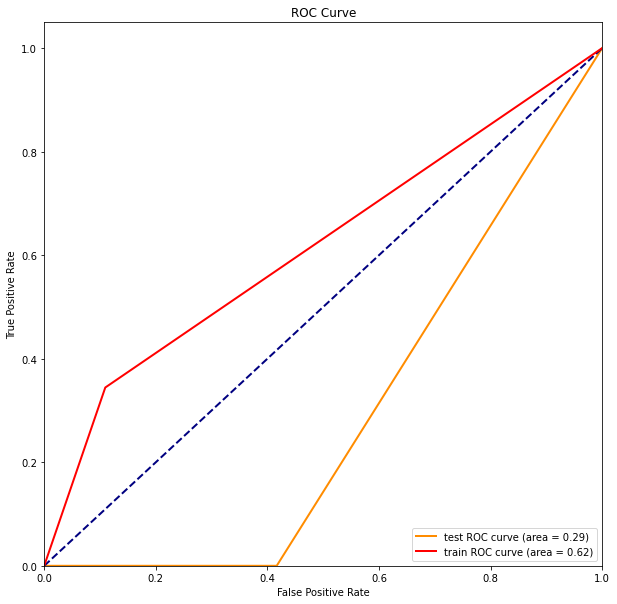


 训练集 0.721881390593047 测试集 0.3888888888888889
roc: 0.29166666666666663
sensitivity: 0.5833333333333334
specificity: 0.0


<Figure size 432x288 with 0 Axes>

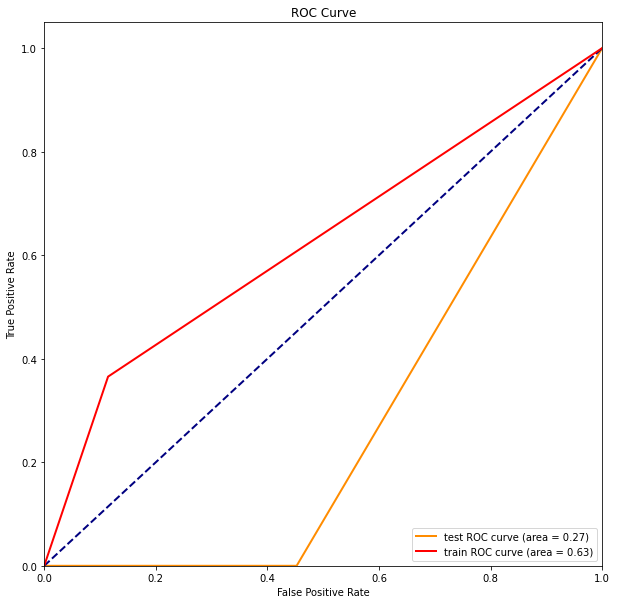


 训练集 0.7192622950819673 测试集 0.41818181818181815
roc: 0.27380952380952384
sensitivity: 0.5476190476190477
specificity: 0.0


<Figure size 432x288 with 0 Axes>

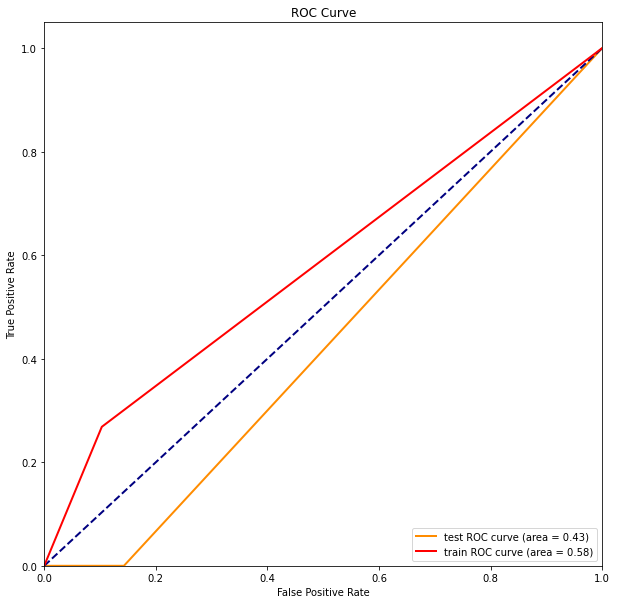


 训练集 0.7049180327868853 测试集 0.5454545454545454
roc: 0.4285714285714286
sensitivity: 0.8571428571428571
specificity: 0.0


<Figure size 432x288 with 0 Axes>

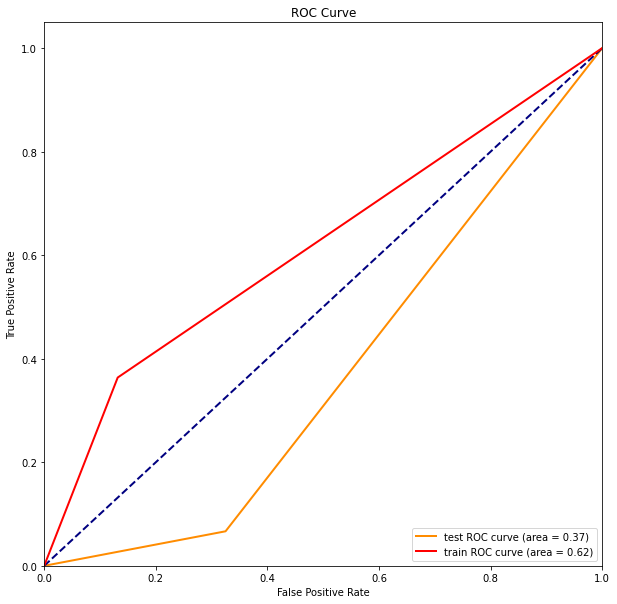


 训练集 0.7090163934426229 测试集 0.509090909090909
roc: 0.37083333333333335
sensitivity: 0.675
specificity: 0.06666666666666667


<Figure size 432x288 with 0 Axes>

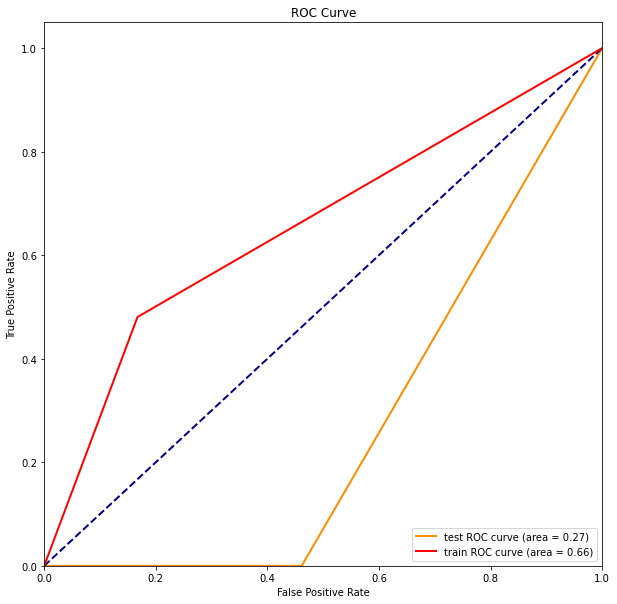


 训练集 0.721881390593047 测试集 0.3888888888888889
roc: 0.2692307692307692
sensitivity: 0.5384615384615384
specificity: 0.0


<Figure size 432x288 with 0 Axes>

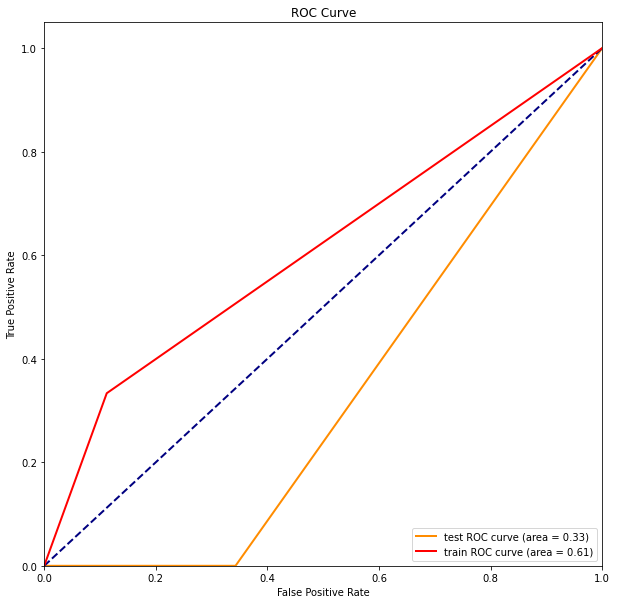


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.32857142857142857
sensitivity: 0.6571428571428571
specificity: 0.0


<Figure size 432x288 with 0 Axes>

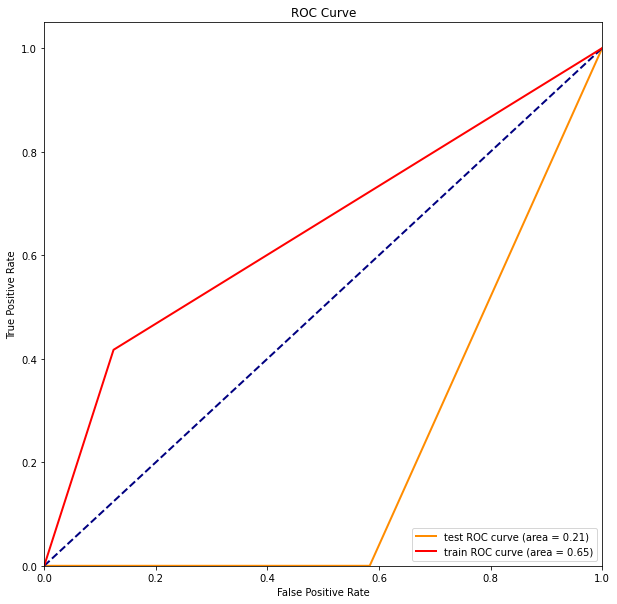


 训练集 0.7341513292433538 测试集 0.2777777777777778
roc: 0.20833333333333331
sensitivity: 0.4166666666666667
specificity: 0.0


<Figure size 432x288 with 0 Axes>

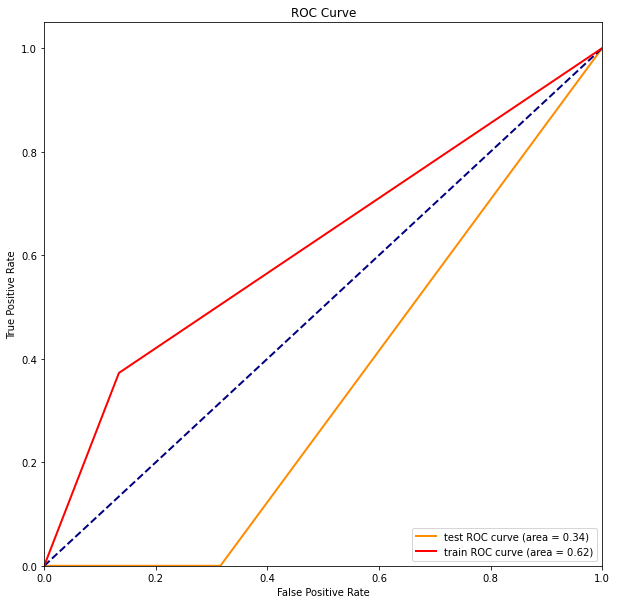


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.34210526315789475
sensitivity: 0.6842105263157895
specificity: 0.0


<Figure size 432x288 with 0 Axes>

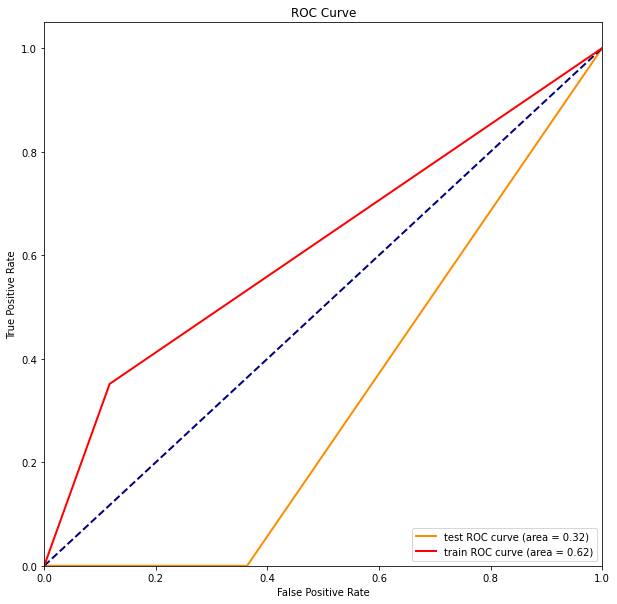


 训练集 0.721881390593047 测试集 0.3888888888888889
roc: 0.3181818181818182
sensitivity: 0.6363636363636364
specificity: 0.0


<Figure size 432x288 with 0 Axes>

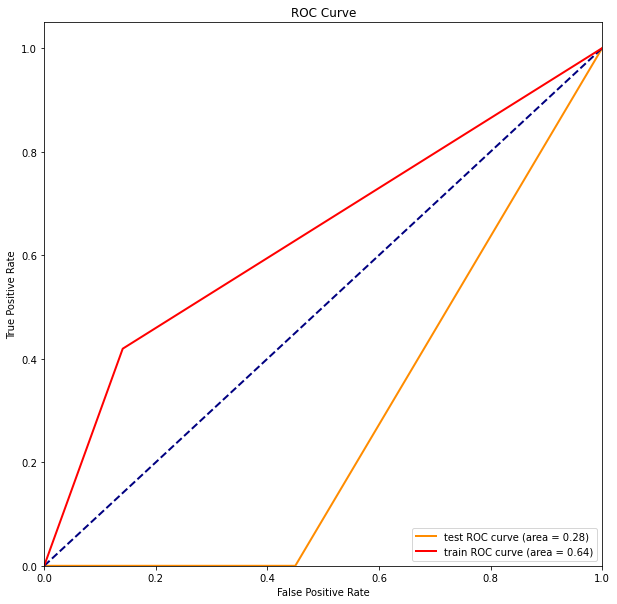


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.275
sensitivity: 0.55
specificity: 0.0


<Figure size 432x288 with 0 Axes>

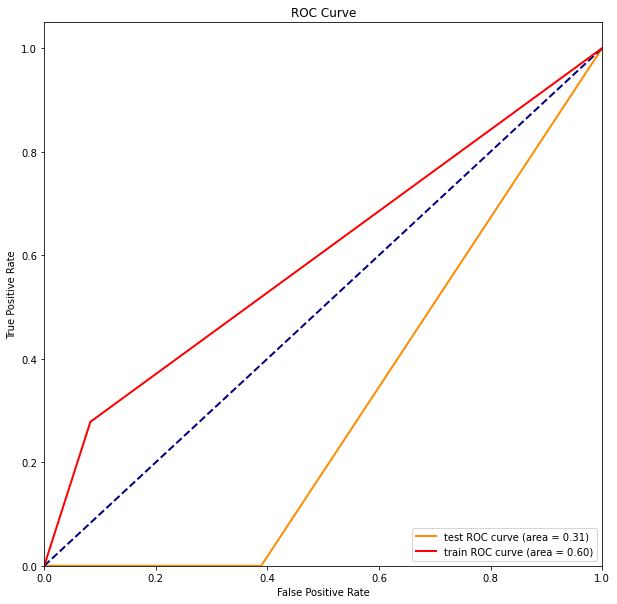


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.3055555555555556
sensitivity: 0.6111111111111112
specificity: 0.0


<Figure size 432x288 with 0 Axes>

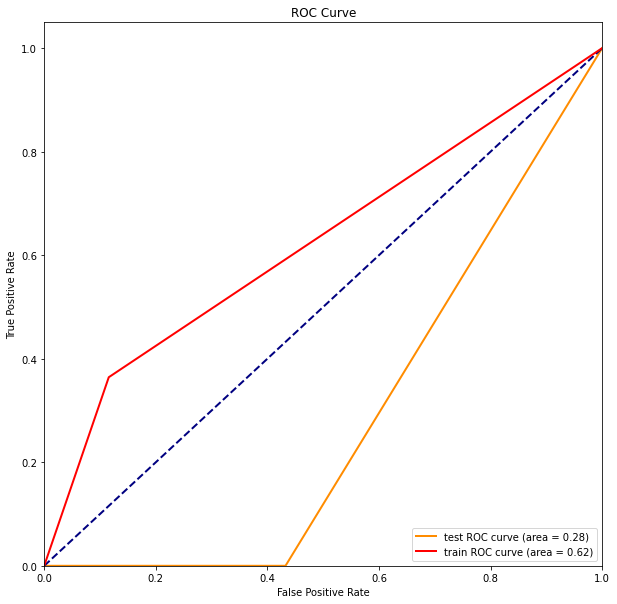


 训练集 0.7233606557377049 测试集 0.38181818181818183
roc: 0.28378378378378377
sensitivity: 0.5675675675675675
specificity: 0.0


<Figure size 432x288 with 0 Axes>

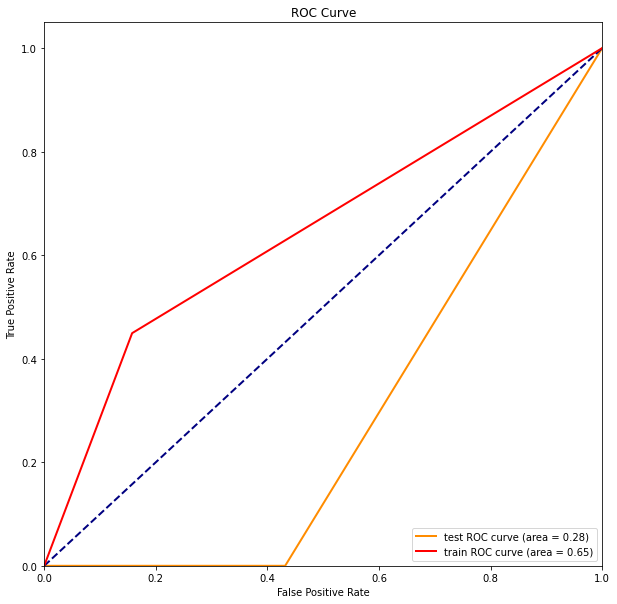


 训练集 0.7151639344262295 测试集 0.45454545454545453
roc: 0.28409090909090906
sensitivity: 0.5681818181818182
specificity: 0.0


<Figure size 432x288 with 0 Axes>

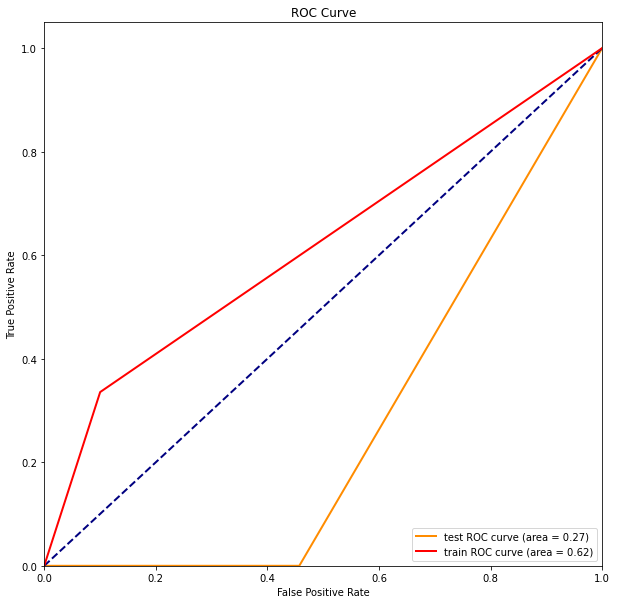


 训练集 0.7274590163934426 测试集 0.34545454545454546
roc: 0.27142857142857146
sensitivity: 0.5428571428571428
specificity: 0.0


<Figure size 432x288 with 0 Axes>

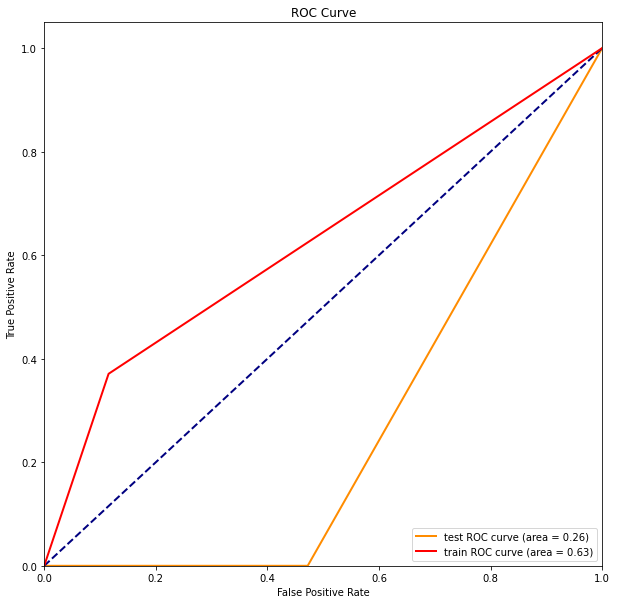


 训练集 0.7259713701431493 测试集 0.35185185185185186
roc: 0.2638888888888889
sensitivity: 0.5277777777777778
specificity: 0.0


<Figure size 432x288 with 0 Axes>

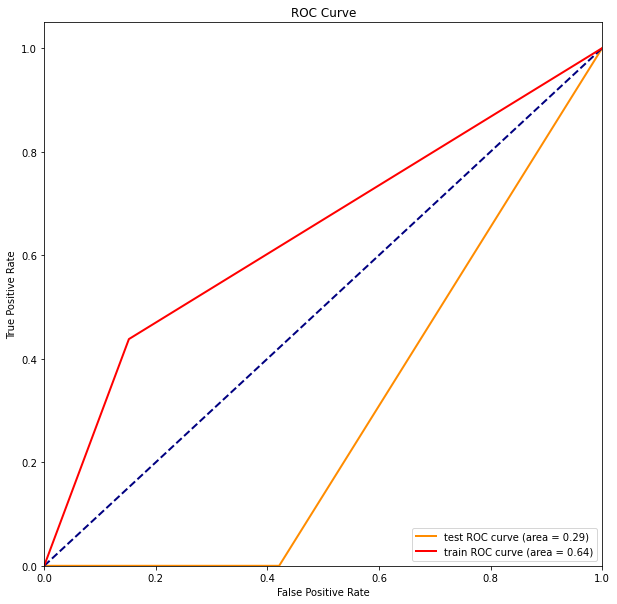


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.2894736842105263
sensitivity: 0.5789473684210527
specificity: 0.0


<Figure size 432x288 with 0 Axes>

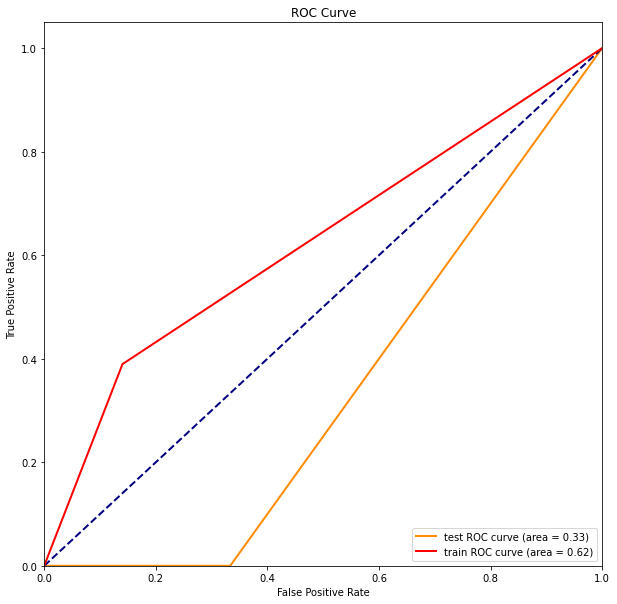


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.33333333333333337
sensitivity: 0.6666666666666666
specificity: 0.0


<Figure size 432x288 with 0 Axes>

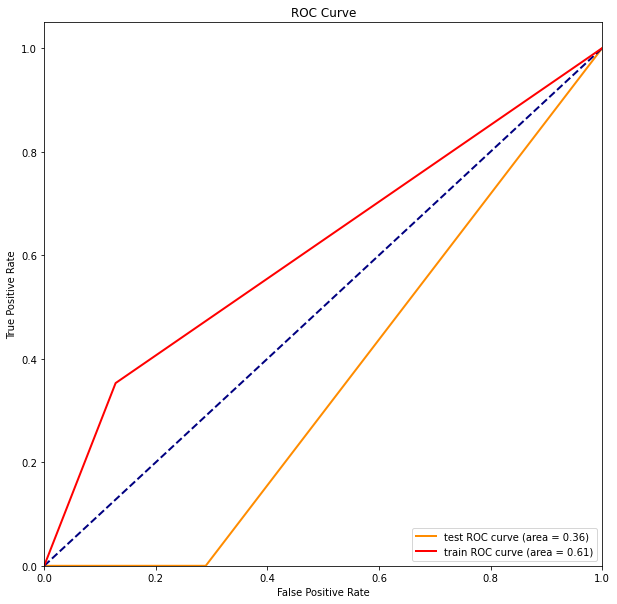


 训练集 0.7096114519427403 测试集 0.5
roc: 0.35526315789473684
sensitivity: 0.7105263157894737
specificity: 0.0


<Figure size 432x288 with 0 Axes>

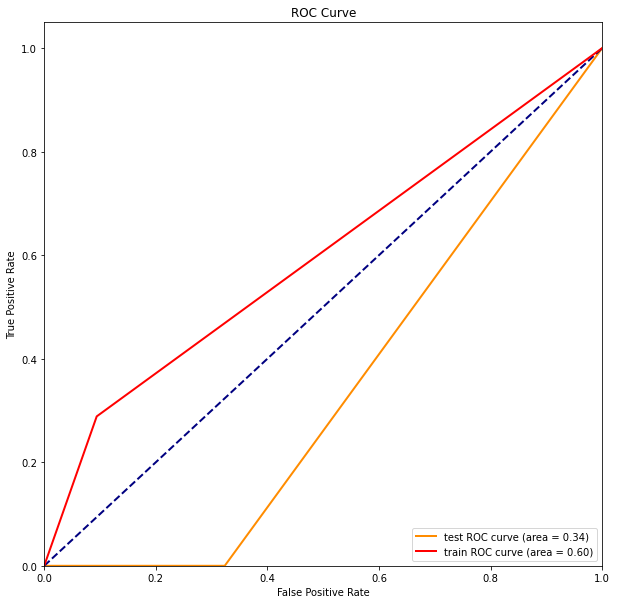


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.3382352941176471
sensitivity: 0.6764705882352942
specificity: 0.0


<Figure size 432x288 with 0 Axes>

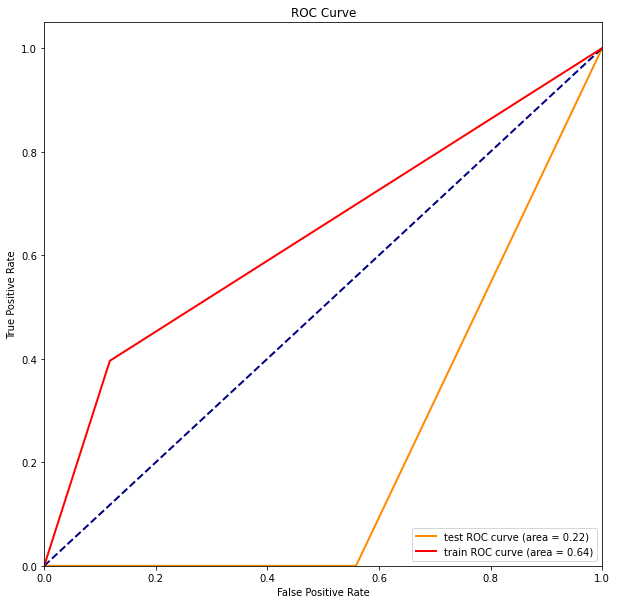


 训练集 0.7341513292433538 测试集 0.2777777777777778
roc: 0.22058823529411764
sensitivity: 0.4411764705882353
specificity: 0.0


<Figure size 432x288 with 0 Axes>

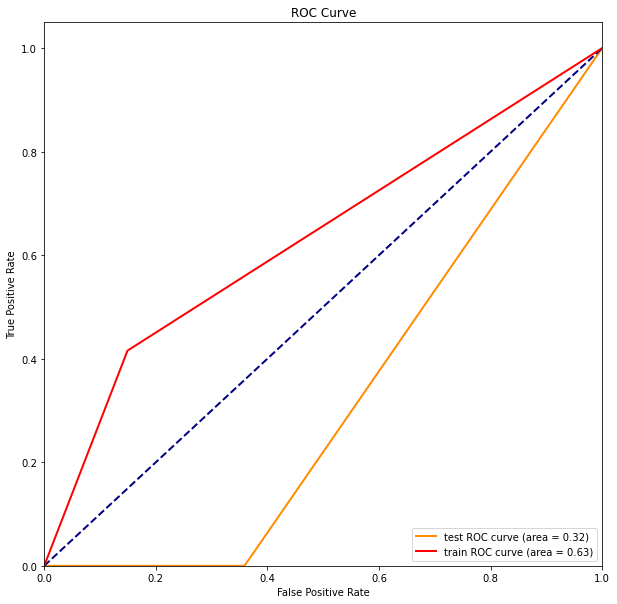


 训练集 0.7137014314928425 测试集 0.46296296296296297
roc: 0.3205128205128205
sensitivity: 0.6410256410256411
specificity: 0.0


<Figure size 432x288 with 0 Axes>

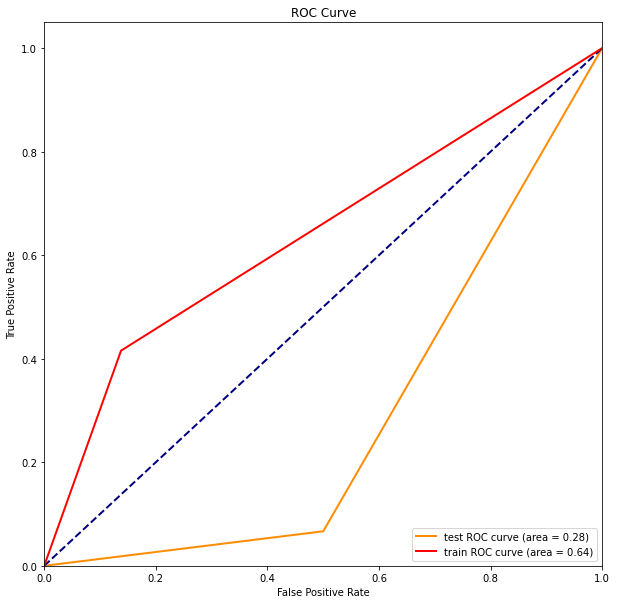


 训练集 0.7213114754098361 测试集 0.38181818181818183
roc: 0.2833333333333333
sensitivity: 0.5
specificity: 0.06666666666666667


<Figure size 432x288 with 0 Axes>

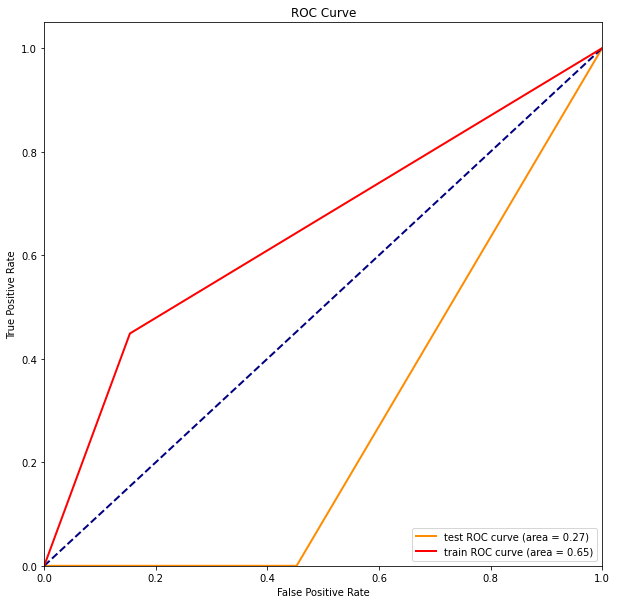


 训练集 0.7192622950819673 测试集 0.41818181818181815
roc: 0.27380952380952384
sensitivity: 0.5476190476190477
specificity: 0.0


<Figure size 432x288 with 0 Axes>

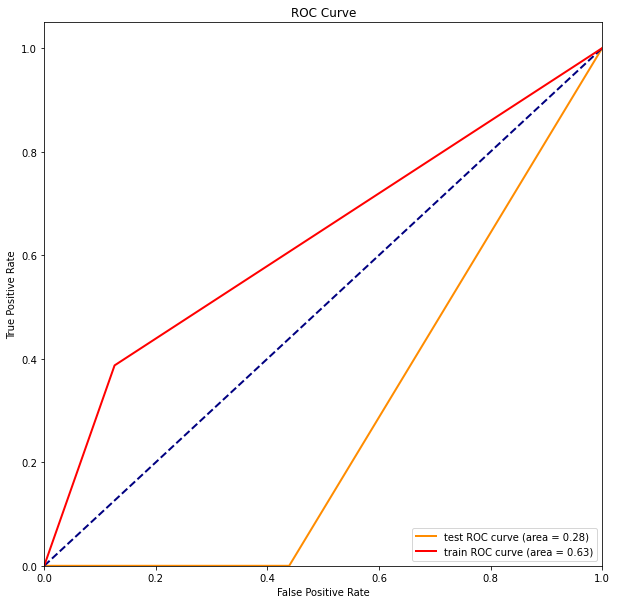


 训练集 0.7192622950819673 测试集 0.41818181818181815
roc: 0.2804878048780488
sensitivity: 0.5609756097560976
specificity: 0.0


<Figure size 432x288 with 0 Axes>

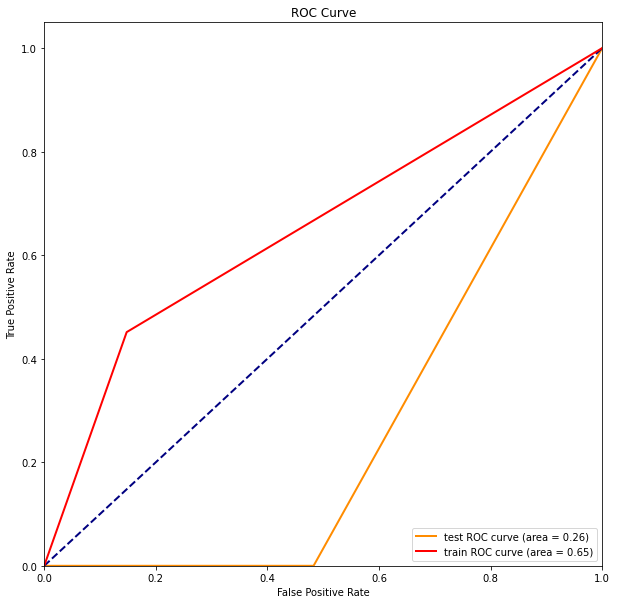


 训练集 0.7341513292433538 测试集 0.2777777777777778
roc: 0.2586206896551724
sensitivity: 0.5172413793103449
specificity: 0.0


<Figure size 432x288 with 0 Axes>

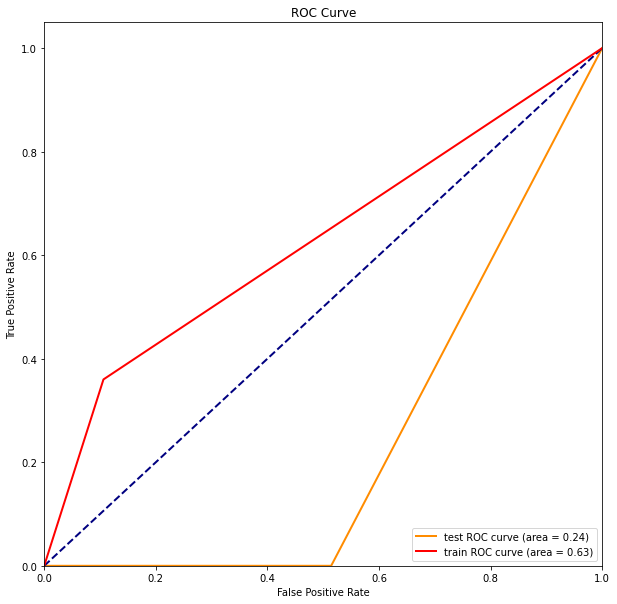


 训练集 0.7300613496932515 测试集 0.3148148148148148
roc: 0.24285714285714288
sensitivity: 0.4857142857142857
specificity: 0.0


<Figure size 432x288 with 0 Axes>

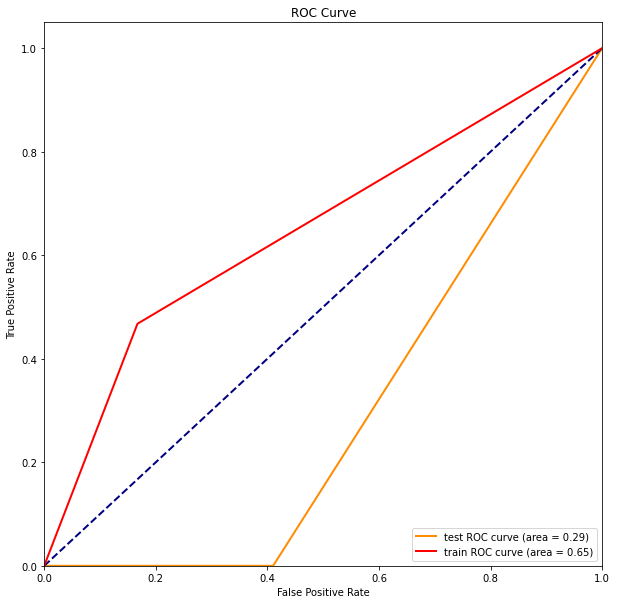


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.2948717948717949
sensitivity: 0.5897435897435898
specificity: 0.0


<Figure size 432x288 with 0 Axes>

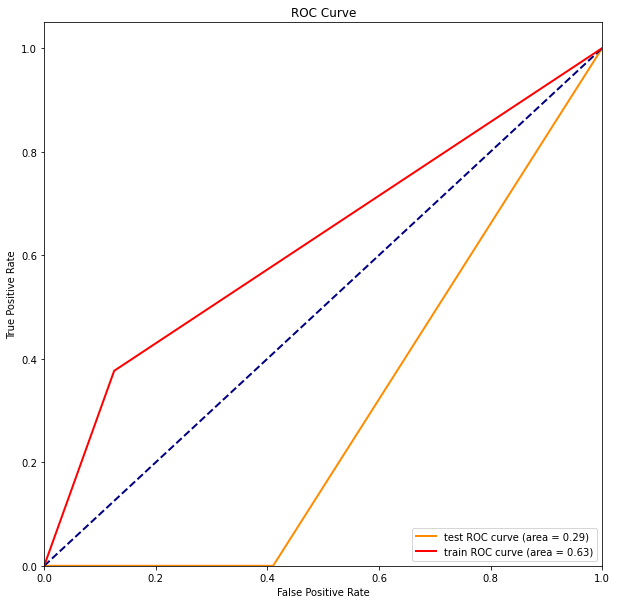


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.2948717948717949
sensitivity: 0.5897435897435898
specificity: 0.0


<Figure size 432x288 with 0 Axes>

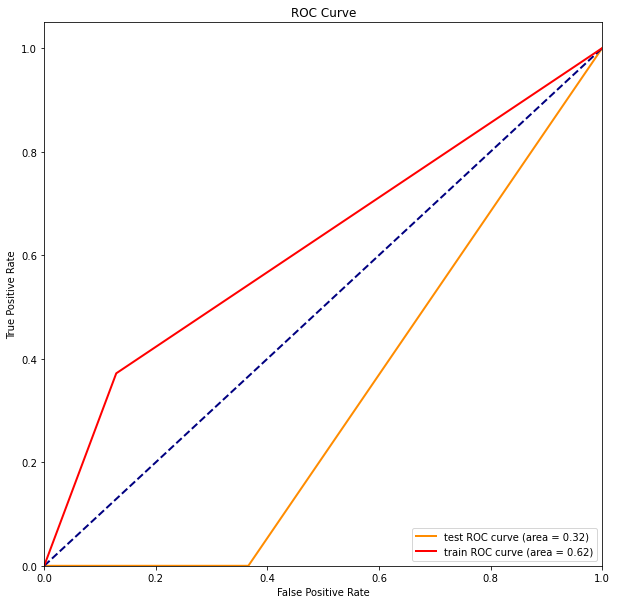


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.3170731707317073
sensitivity: 0.6341463414634146
specificity: 0.0


<Figure size 432x288 with 0 Axes>

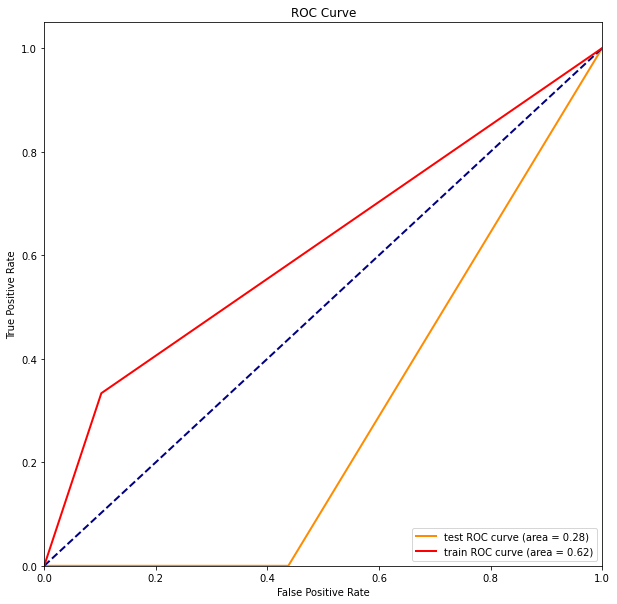


 训练集 0.7280163599182005 测试集 0.3333333333333333
roc: 0.28125
sensitivity: 0.5625
specificity: 0.0


<Figure size 432x288 with 0 Axes>

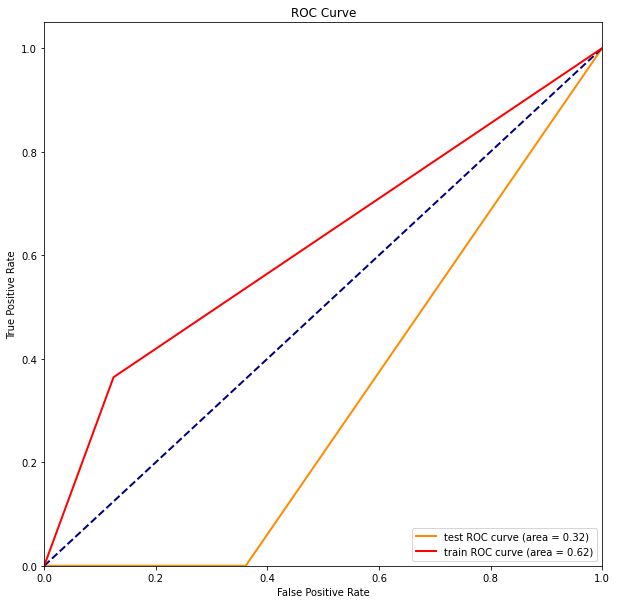


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.3194444444444444
sensitivity: 0.6388888888888888
specificity: 0.0


<Figure size 432x288 with 0 Axes>

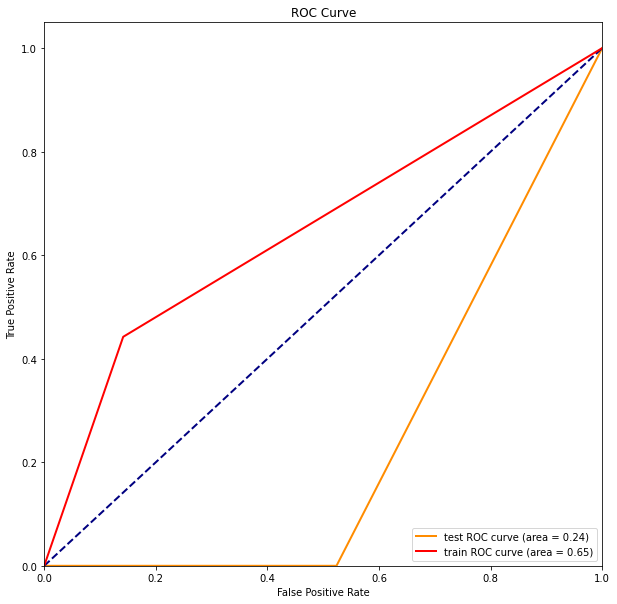


 训练集 0.7254098360655737 测试集 0.36363636363636365
roc: 0.23809523809523808
sensitivity: 0.47619047619047616
specificity: 0.0


<Figure size 432x288 with 0 Axes>

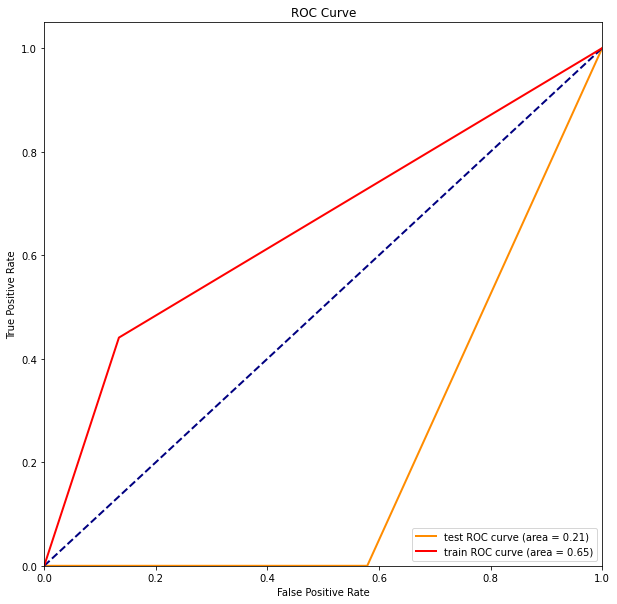


 训练集 0.7336065573770492 测试集 0.2909090909090909
roc: 0.21052631578947367
sensitivity: 0.42105263157894735
specificity: 0.0


<Figure size 432x288 with 0 Axes>

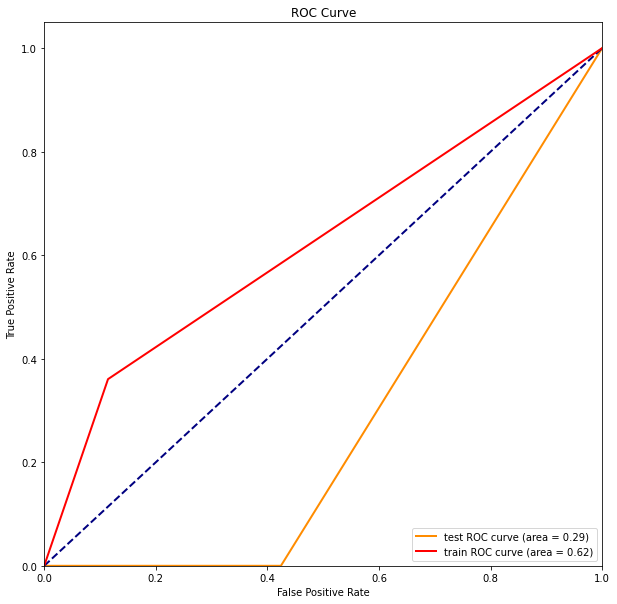


 训练集 0.7274590163934426 测试集 0.34545454545454546
roc: 0.28787878787878785
sensitivity: 0.5757575757575758
specificity: 0.0


<Figure size 432x288 with 0 Axes>

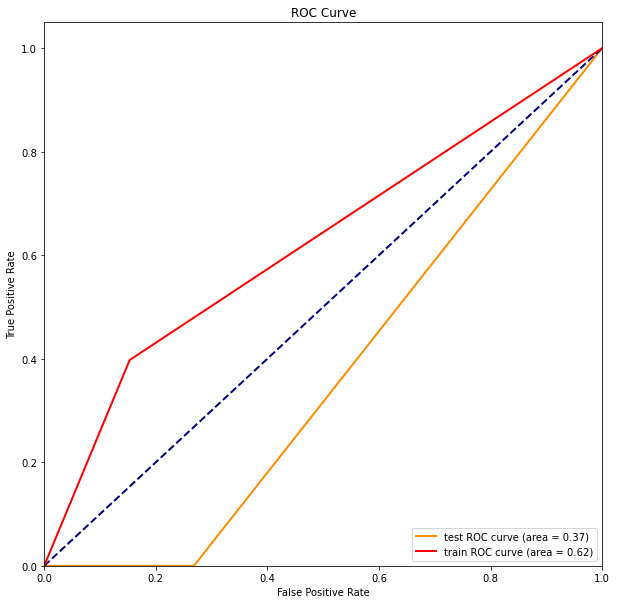


 训练集 0.7034764826175869 测试集 0.5555555555555556
roc: 0.36585365853658536
sensitivity: 0.7317073170731707
specificity: 0.0


<Figure size 432x288 with 0 Axes>

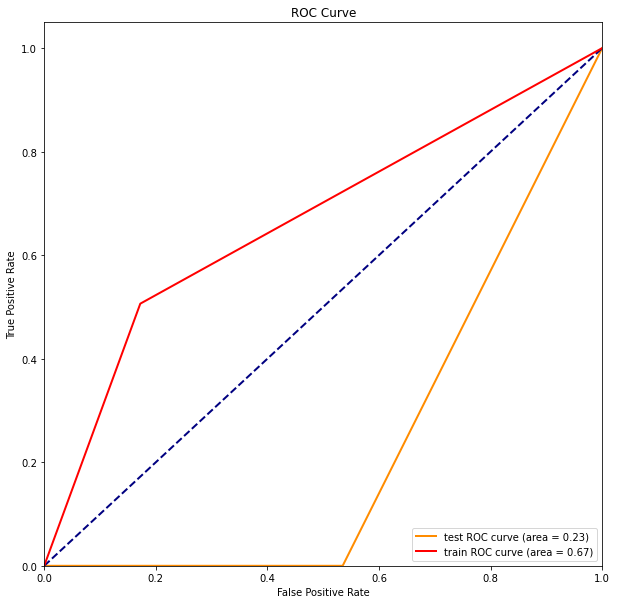


 训练集 0.7239263803680982 测试集 0.37037037037037035
roc: 0.23255813953488375
sensitivity: 0.46511627906976744
specificity: 0.0


<Figure size 432x288 with 0 Axes>

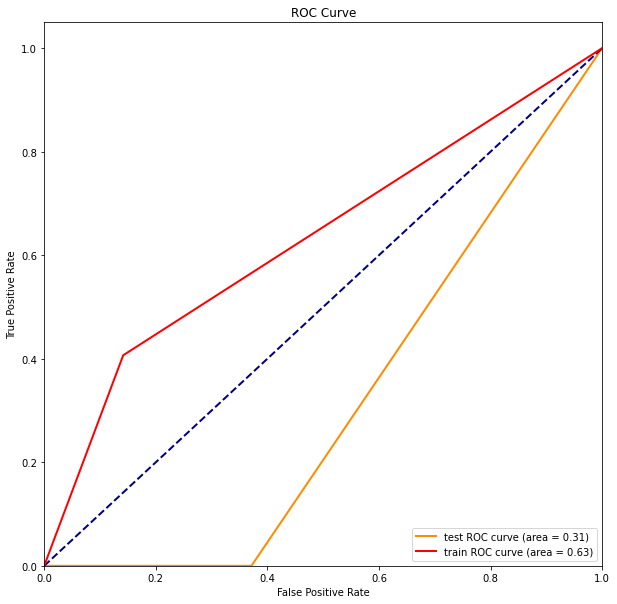


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.3142857142857143
sensitivity: 0.6285714285714286
specificity: 0.0


<Figure size 432x288 with 0 Axes>

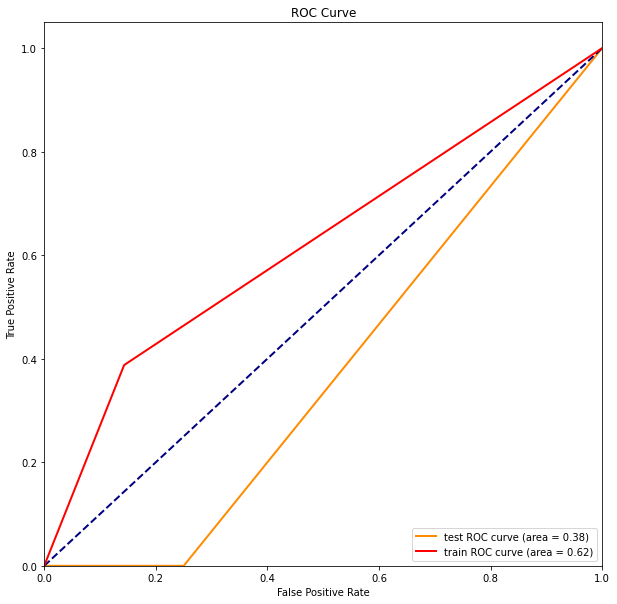


 训练集 0.7157464212678937 测试集 0.4444444444444444
roc: 0.375
sensitivity: 0.75
specificity: 0.0


<Figure size 432x288 with 0 Axes>

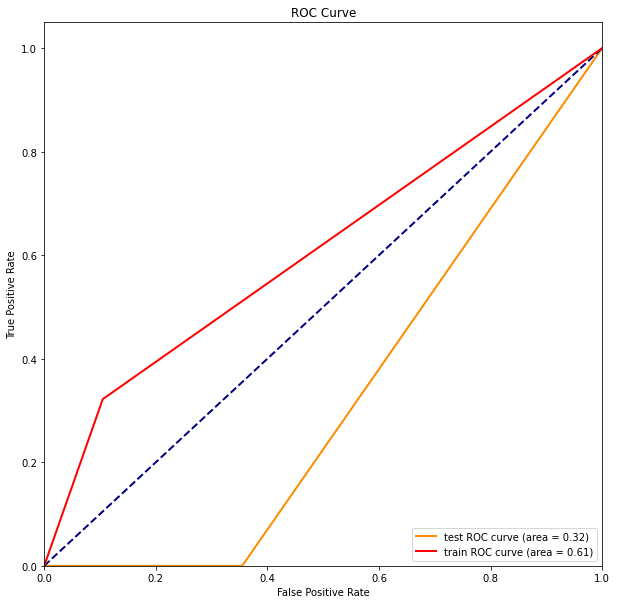


 训练集 0.7239263803680982 测试集 0.37037037037037035
roc: 0.3225806451612903
sensitivity: 0.6451612903225806
specificity: 0.0


<Figure size 432x288 with 0 Axes>

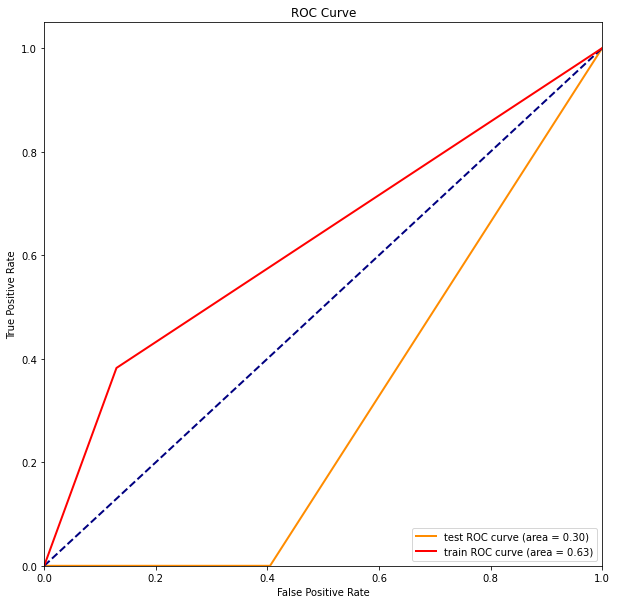


 训练集 0.7137014314928425 测试集 0.46296296296296297
roc: 0.2976190476190476
sensitivity: 0.5952380952380952
specificity: 0.0


<Figure size 432x288 with 0 Axes>

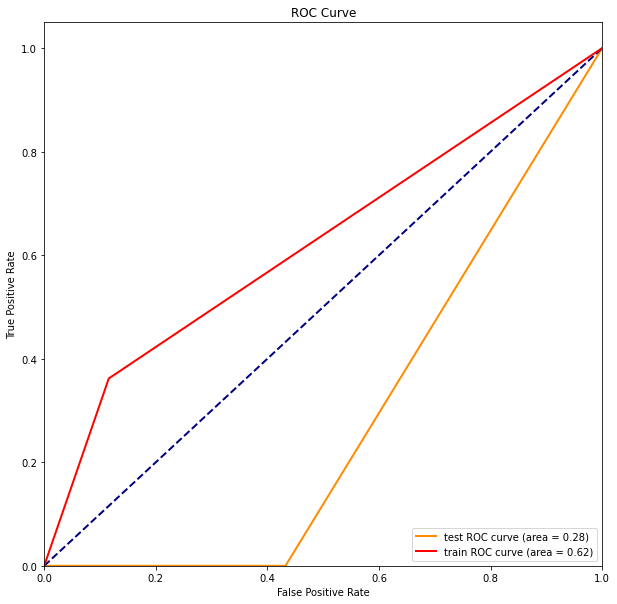


 训练集 0.721881390593047 测试集 0.3888888888888889
roc: 0.28378378378378377
sensitivity: 0.5675675675675675
specificity: 0.0


<Figure size 432x288 with 0 Axes>

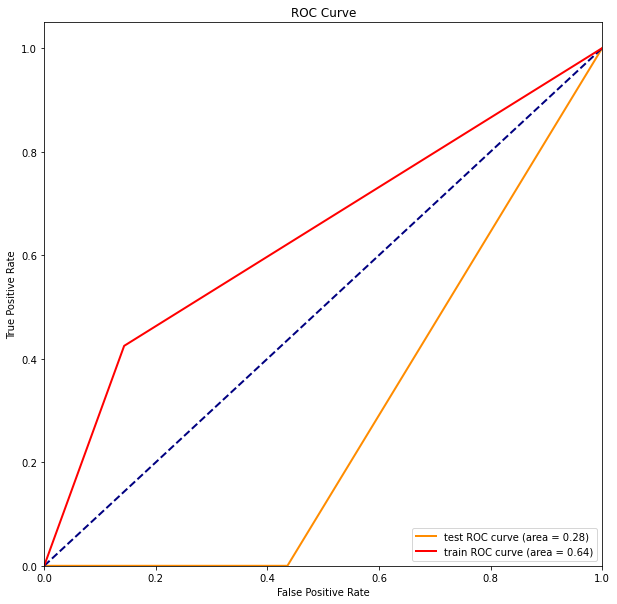


 训练集 0.7213114754098361 测试集 0.4
roc: 0.28205128205128205
sensitivity: 0.5641025641025641
specificity: 0.0


<Figure size 432x288 with 0 Axes>

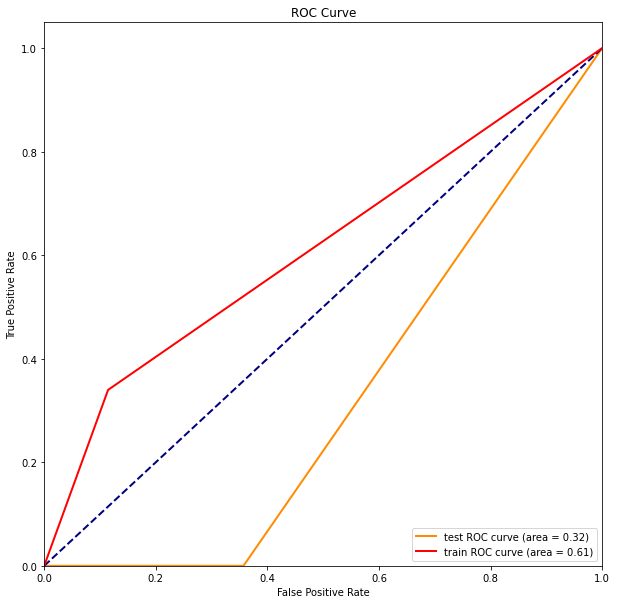


 训练集 0.7110655737704918 测试集 0.4909090909090909
roc: 0.3214285714285714
sensitivity: 0.6428571428571429
specificity: 0.0


<Figure size 432x288 with 0 Axes>

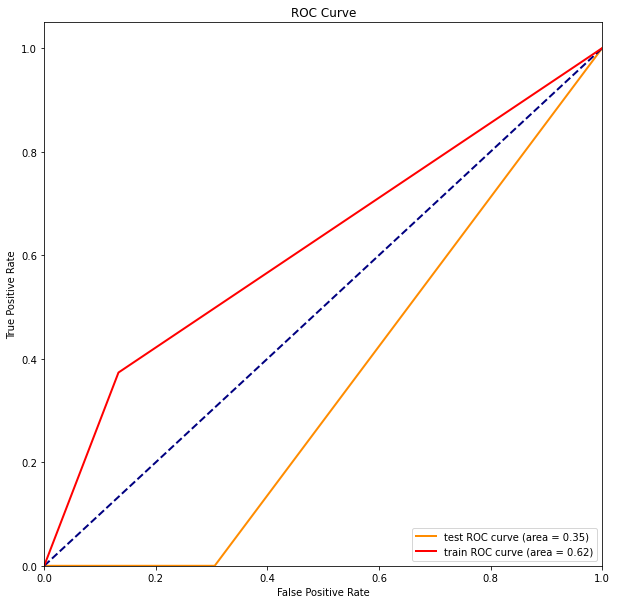


 训练集 0.7151639344262295 测试集 0.45454545454545453
roc: 0.3472222222222222
sensitivity: 0.6944444444444444
specificity: 0.0


<Figure size 432x288 with 0 Axes>

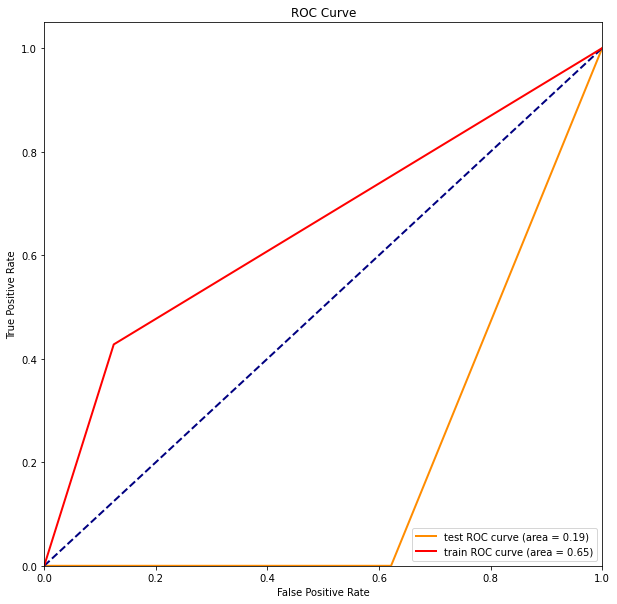


 训练集 0.7361963190184049 测试集 0.25925925925925924
roc: 0.1891891891891892
sensitivity: 0.3783783783783784
specificity: 0.0


<Figure size 432x288 with 0 Axes>

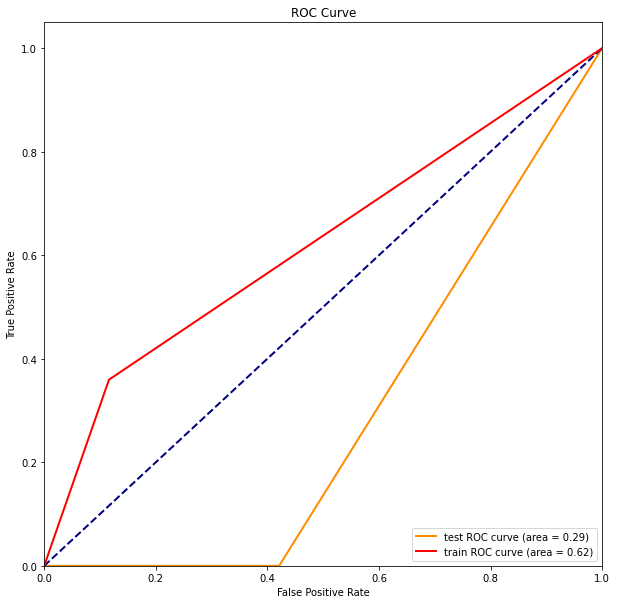


 训练集 0.7198364008179959 测试集 0.4074074074074074
roc: 0.2894736842105263
sensitivity: 0.5789473684210527
specificity: 0.0


<Figure size 432x288 with 0 Axes>

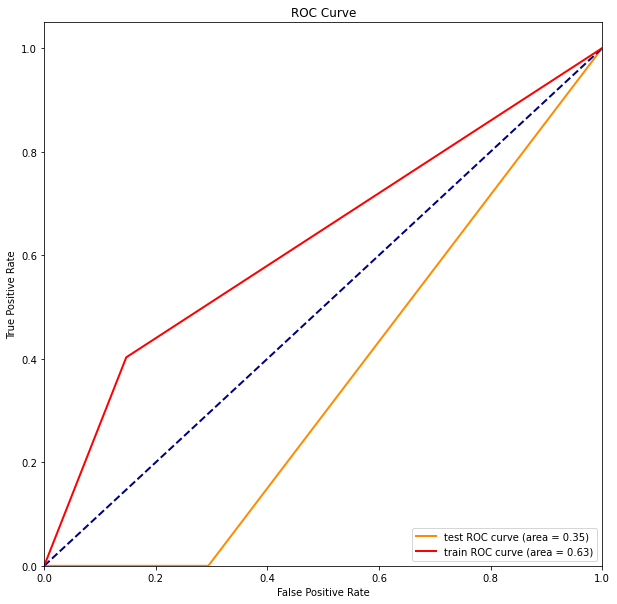


 训练集 0.7157464212678937 测试集 0.4444444444444444
roc: 0.3529411764705882
sensitivity: 0.7058823529411765
specificity: 0.0


<Figure size 432x288 with 0 Axes>

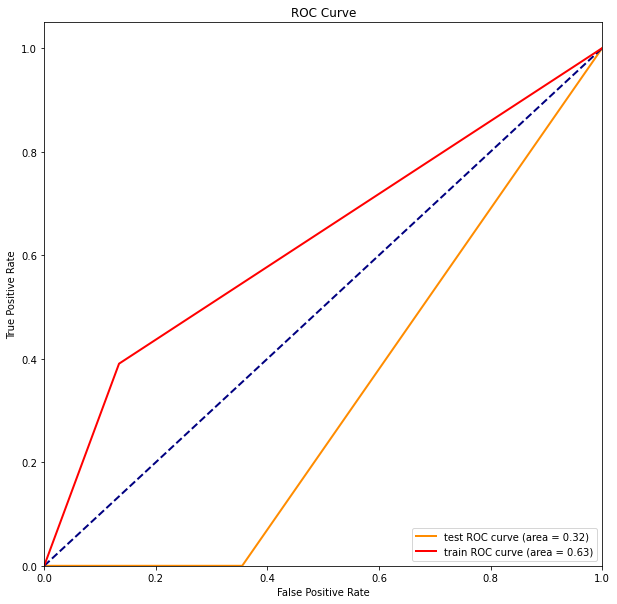


 训练集 0.7239263803680982 测试集 0.37037037037037035
roc: 0.3225806451612903
sensitivity: 0.6451612903225806
specificity: 0.0


<Figure size 432x288 with 0 Axes>

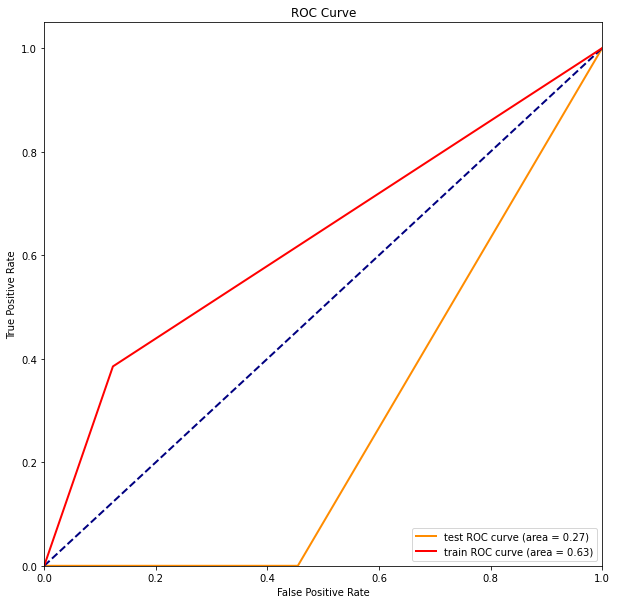


 训练集 0.7280163599182005 测试集 0.3333333333333333
roc: 0.2727272727272727
sensitivity: 0.5454545454545454
specificity: 0.0


<Figure size 432x288 with 0 Axes>

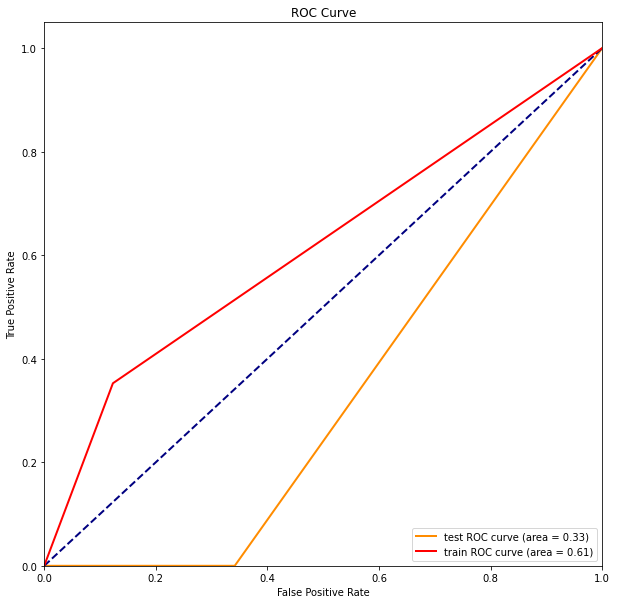


 训练集 0.7096114519427403 测试集 0.5
roc: 0.3292682926829268
sensitivity: 0.6585365853658537
specificity: 0.0


<Figure size 432x288 with 0 Axes>

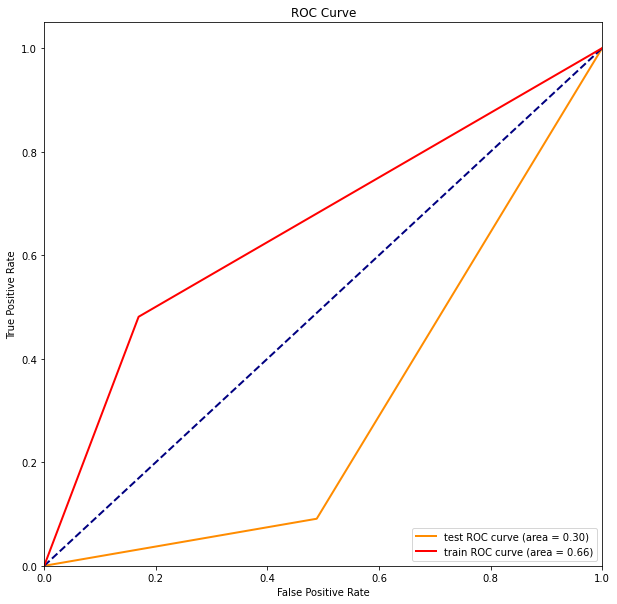


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.3012684989429175
sensitivity: 0.5116279069767442
specificity: 0.09090909090909091


<Figure size 432x288 with 0 Axes>

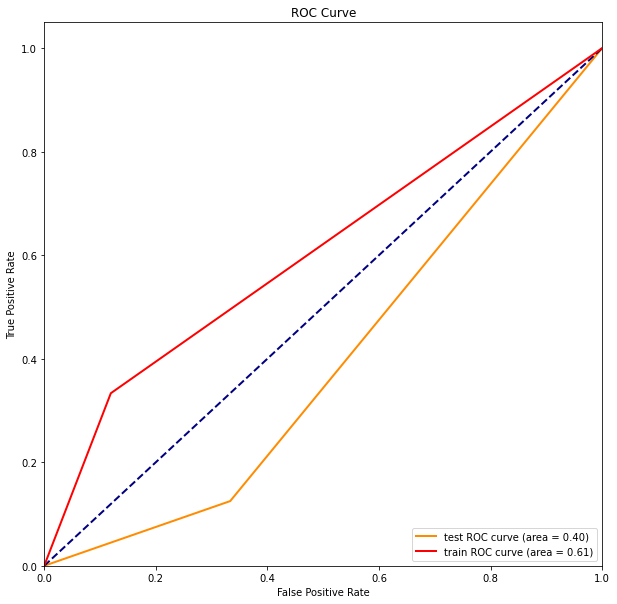


 训练集 0.7090163934426229 测试集 0.509090909090909
roc: 0.39583333333333337
sensitivity: 0.6666666666666666
specificity: 0.125


<Figure size 432x288 with 0 Axes>

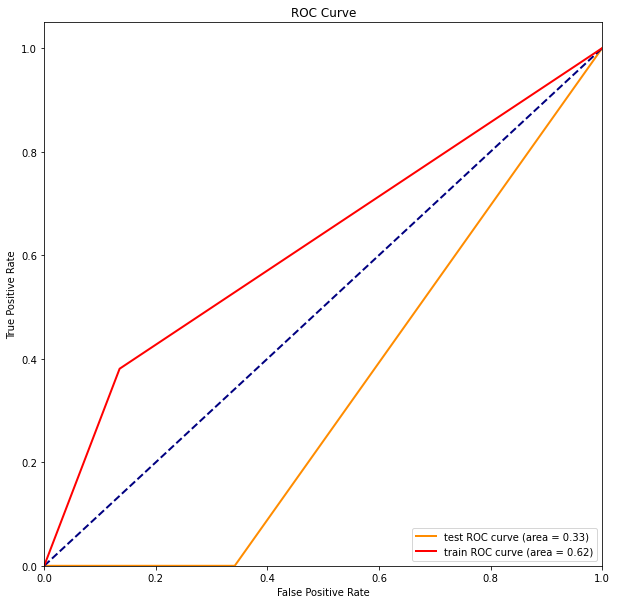


 训练集 0.7110655737704918 测试集 0.4909090909090909
roc: 0.3292682926829268
sensitivity: 0.6585365853658537
specificity: 0.0


<Figure size 432x288 with 0 Axes>

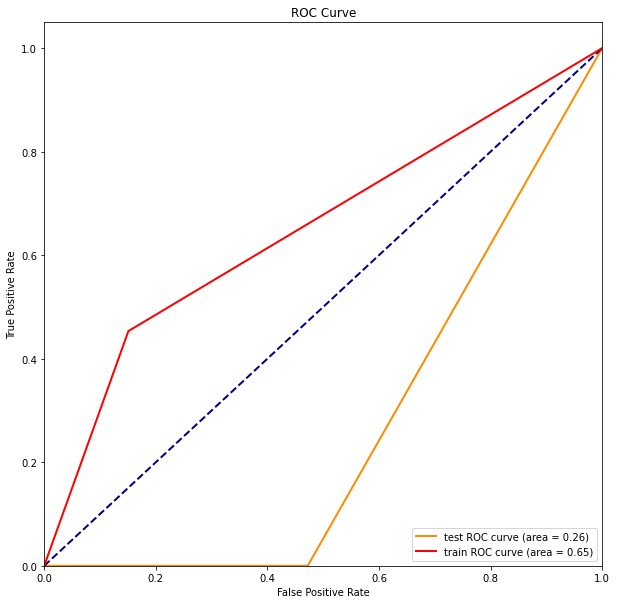


 训练集 0.7274590163934426 测试集 0.34545454545454546
roc: 0.2638888888888889
sensitivity: 0.5277777777777778
specificity: 0.0


<Figure size 432x288 with 0 Axes>

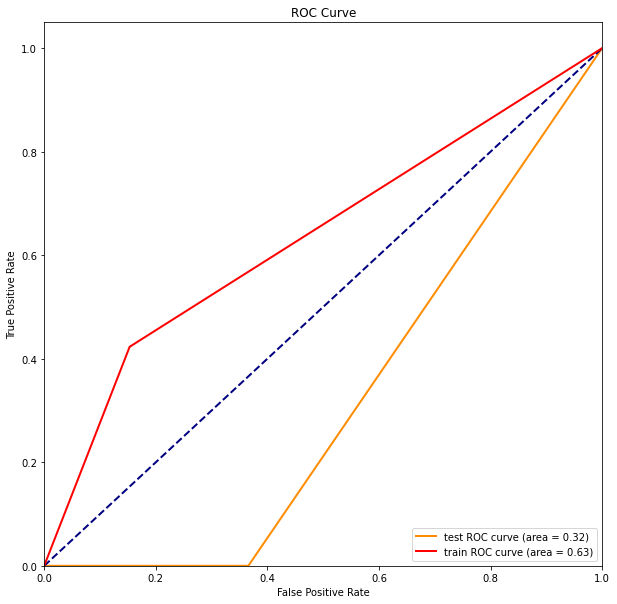


 训练集 0.7116564417177914 测试集 0.48148148148148145
roc: 0.3170731707317073
sensitivity: 0.6341463414634146
specificity: 0.0


<Figure size 432x288 with 0 Axes>

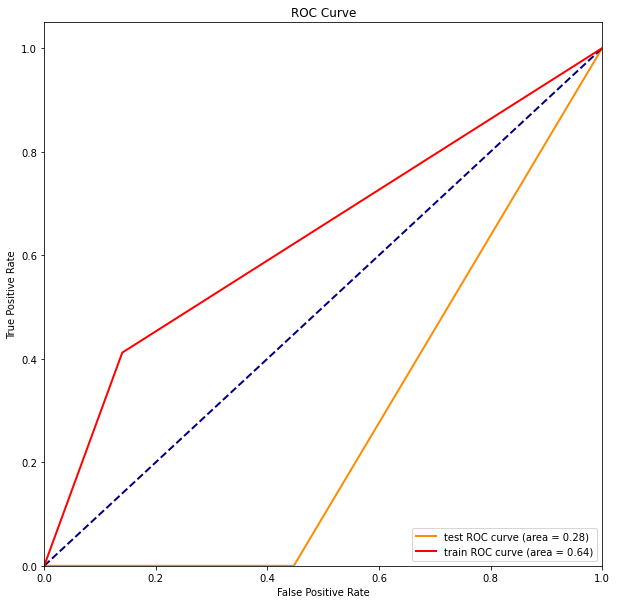


 训练集 0.7198364008179959 测试集 0.3888888888888889
roc: 0.2763157894736842
sensitivity: 0.5526315789473685
specificity: 0.0


<Figure size 432x288 with 0 Axes>

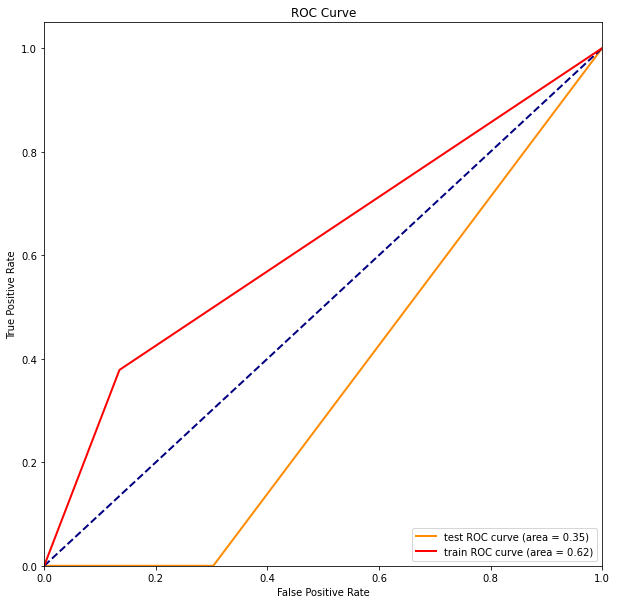


 训练集 0.7177914110429447 测试集 0.42592592592592593
roc: 0.3484848484848485
sensitivity: 0.696969696969697
specificity: 0.0


<Figure size 432x288 with 0 Axes>

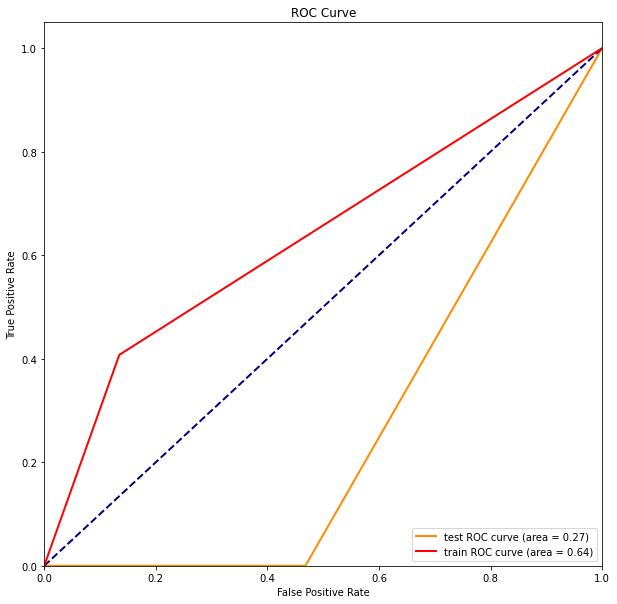


 训练集 0.7137014314928425 测试集 0.46296296296296297
roc: 0.26595744680851063
sensitivity: 0.5319148936170213
specificity: 0.0


<Figure size 432x288 with 0 Axes>

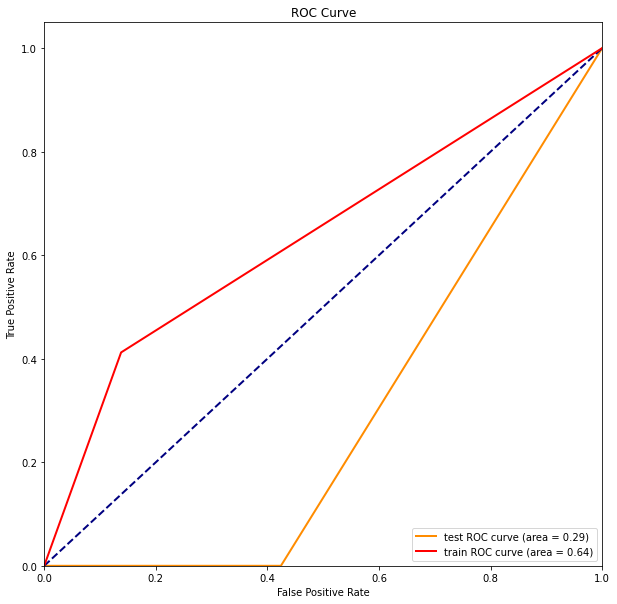


 训练集 0.7259713701431493 测试集 0.35185185185185186
roc: 0.28787878787878785
sensitivity: 0.5757575757575758
specificity: 0.0


<Figure size 432x288 with 0 Axes>

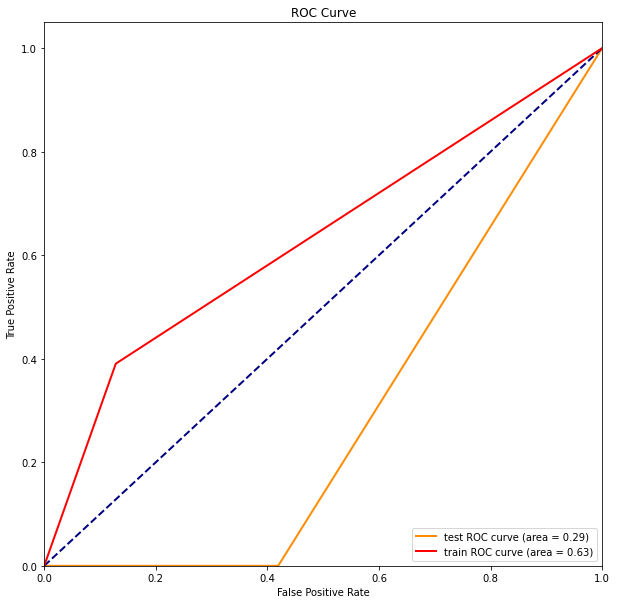


 训练集 0.7280163599182005 测试集 0.3333333333333333
roc: 0.29032258064516125
sensitivity: 0.5806451612903226
specificity: 0.0


<Figure size 432x288 with 0 Axes>

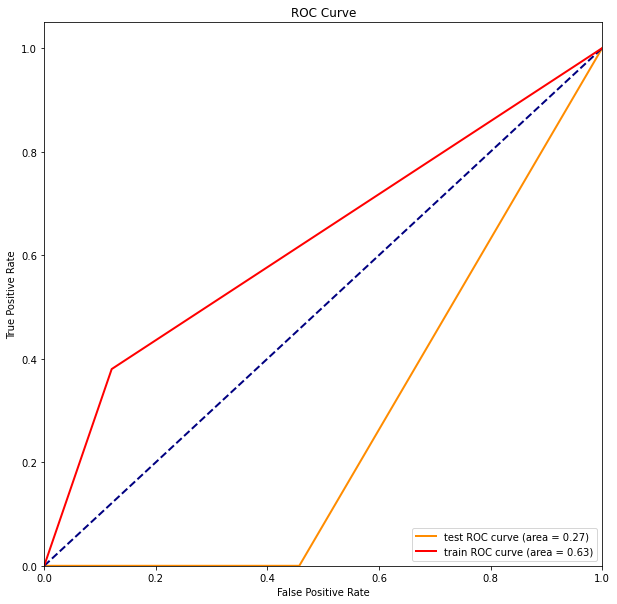


 训练集 0.7259713701431493 测试集 0.35185185185185186
roc: 0.27142857142857146
sensitivity: 0.5428571428571428
specificity: 0.0
average test accuracy: 0.40862289562289567
average train accuracy: 0.7198074860035534
average roc: 0.29901394081759636
average sensitivity: 0.5932900361473473
average specificity: 0.07896409146409146


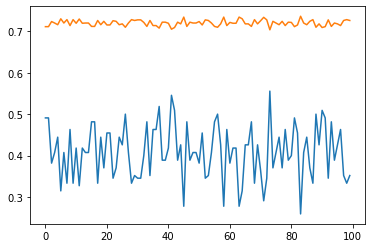

In [20]:
kfold_train_test(10)